In [122]:
#load libraries 
import time,os
from matplotlib.offsetbox import AnchoredText
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines , numpy as np, math, pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#import cudf
#import ROOT
#from ROOT import TFile

#import root_pandas
import importlib
#from toggle_cell import hide_cell 
%matplotlib inline

#presets for plot style
from scipy.constants import golden
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap('inferno', 12)
autumn = cm.get_cmap('autumn', 12)

#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
#tf.config.experimental.set_memory_growth(physical_devices[1], True)
rc = plt.rc
rc('text', usetex=False)
import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=False)
rc('font', size=15)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)
import root_pandas,glob

def read_n(pattern, n):
    if not '*' in pattern:
        a = root_pandas.read_root(pattern,chunksize=int(n))
    else:
        a = root_pandas.read_root(glob.glob(pattern),chunksize=int(n))
    for b in a:
        del a
        print(n)
        return b

from scipy.optimize import curve_fit

plt.rcParams['savefig.bbox']='tight'
import misc_util
importlib.reload(misc_util)
import gc

import ROOT
import collections
pdg = ROOT.TDatabasePDG()

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

In [94]:
#produce plots similar to those in NC-DIS paper https://journals.aps.org/prd/pdf/10.1103/PhysRevD.102.074015

In [95]:
#df_all = root_pandas.read_root("../CC_DIS_EIC_1.5M_all.root")
#df_all = root_pandas.read_root("../CC_DIS_EIC_test_10k.root")

df_all = root_pandas.read_root("../test.root")

In [96]:
print(df_all.memory_usage().sum()/1024**3, "GB")
ints = df_all.select_dtypes(include=['int64']).columns.tolist()
df_all[ints] = df_all[ints].astype('int16')
print(df_all.memory_usage().sum()/1024**3, "GB")
#for col in "Hadron_i Jet_i Neutrino_PID Quark_PID GenJet_NCharged GenJet_NNeutrals Jet_NCharged Jet_NNeutrals".split():
    

0.414573073387146 GB
0.414573073387146 GB


In [97]:
print(df_all.memory_usage().sum()/1024**3, "GB")

0.414573073387146 GB


In [98]:
import gc
gc.collect()

16705

In [99]:
print(list(df_all.columns))

['Jet_PT', 'Jet_Eta', 'Jet_Phi', 'Jet_Mass', 'Jet_DeltaEta', 'Jet_DeltaPhi', 'Jet_NCharged', 'Jet_NNeutrals', 'Jet_NeutralEnergyFraction', 'Jet_ChargedEnergyFraction', 'GenJet_PT', 'GenJet_Eta', 'GenJet_Phi', 'GenJet_Mass', 'GenJet_DeltaEta', 'GenJet_DeltaPhi', 'GenJet_NCharged', 'GenJet_NNeutrals', 'GenJet_NeutralEnergyFraction', 'GenJet_ChargedEnergyFraction', 'Neutrino_PID', 'Neutrino_Status', 'Neutrino_E', 'Neutrino_Px', 'Neutrino_Py', 'Neutrino_Pz', 'Neutrino_PT', 'Neutrino_Eta', 'Quark_PID', 'Quark_Status', 'Quark_E', 'Quark_Px', 'Quark_Py', 'Quark_Pz', 'Quark_PT', 'Quark_Eta', 'MissingET_MET', 'MissingET_Eta', 'MissingET_Phi', 'GenMissingET_MET', 'GenMissingET_Eta', 'GenMissingET_Phi', 'Event_Number', 'Gen_W2', 'Gen_x', 'Gen_y', 'Gen_Q2', 'Hadron_PID', 'Hadron_Charge', 'Hadron_P', 'Hadron_PT', 'Hadron_Eta', 'Hadron_Phi', 'Hadron_E', 'Hadron_ET', 'Hadron_Eem', 'Hadron_Ehad', 'GenHadron_PID', 'GenHadron_Charge', 'GenHadron_P', 'GenHadron_PT', 'GenHadron_Eta', 'GenHadron_Phi', 'Gen

In [100]:
if not "Hadron_i" in df_all.columns:
    df_all['Hadron_i'] = df_all.eval("Jet_i-Jet_i")
df_jets = df_all.query('(Jet_PT > 0 or GenJet_PT>0) and Hadron_i == 0')
df_rg = df_all.query('Jet_E > 0 and GenJet_E>0 and Hadron_i == 0')
df_nu = df_all.query("Jet_i == 0 and Hadron_i == 0") #just neutrinos.  
df_hadrons = df_all.query("Hadron_P>0 or Hadron_E>0")
print([len(a) for a in (df_all,df_jets,df_rg,df_nu,df_hadrons)])
del df_all

[618256, 119689, 66426, 100000, 565954]


In [101]:
# fig 1 is feynman diagram (not included here)

In [74]:
def hack_legend(labels = 'Pythia;theory'.split(';'),*varg,**kwarg):
    #create a legend with lines instead of boxes
    handle1 = matplotlib.lines.Line2D([], [], c='tab:blue')
    handle2 = matplotlib.lines.Line2D([], [], c='tab:orange')
    plt.legend(handles=[handle1, handle2],labels=labels,framealpha=0,**kwarg)

neutrinos:
x,dx,y,dy,n
11.5,1.5,65300.0,1806.931099959265,1306
14.5,1.5,65400.0,1808.3141320025125,1308
17.5,1.5,60450.0,1738.5338650713709,1209
21.5,2.5,49890.0,1223.3969102462208,1663
27.0,3.0,33700.0,917.8779875342909,1348
33.5,3.5,14142.857142857143,550.5099676570769,660
42.0,5.0,1725.0,160.85707942145413,115


jets:
x,dx,y,dy,n
11.5,1.5,70450.0,1876.832437912346,1409
14.5,1.5,65650.0,1811.7670931993437,1313
17.5,1.5,60000.0,1732.0508075688774,1200
21.5,2.5,47580.0,1194.7384651043926,1586
27.0,3.0,31100.0,881.7596044274198,1244
33.5,3.5,12064.285714285714,508.4490221873431,563
42.0,5.0,1620.0,155.88457268119896,108


jets:
x,dx,y,dy,n
11.5,1.5,39450.0,1404.4571905188138,789
14.5,1.5,37800.0,1374.772708486752,756
17.5,1.5,35500.0,1332.2912594474228,710
21.5,2.5,26520.0,891.9641248391104,884
27.0,3.0,19500.0,698.2120021884471,780
33.5,3.5,8442.857142857143,425.3449980274116,394
42.0,5.0,1320.0,140.7124727947029,88


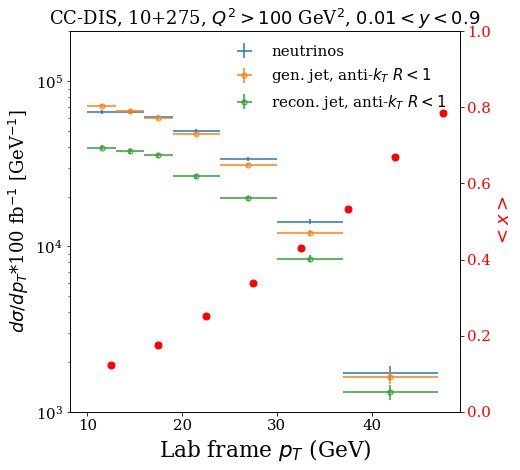

In [11]:
# fig2

from io import StringIO

s="""x,y
5.00,0.02
6.85,0.03
9.34,0.05
12.71,0.10
17.29,0.17
23.55,0.28
32.15,0.43
43.80,0.62"""
NC_pt_x = pd.read_csv(StringIO(s))
s="""x,y
5.96,172760479.70
8.05,62682393.51
11.02,21656031.51
15.04,7486742.06
20.42,2124968.13
27.89,396440.17
38.01,28914.34"""
NC_pt_sige = pd.read_csv(StringIO(s))



useGenJets=1
useStdErrorOnMean=1

partitions = [10,13, 16,19, 24, 30, 37,47]
xs,dxs,y1s,dy1s,y2s,dy2s = [],[],[],[],[],[]

fig,ax = plt.subplots(1,1, figsize=(7,7),sharex='all')

plt.sca(ax)
ngen = len(df_nu)
lumi = ngen/1.5e6
q2min, ymax, ymin = 100, .9, .01
q = f"Gen_Q2 >{q2min} and Gen_y < {ymax} and Gen_y > {ymin}"
xs,dxs,y1s,dy1s,y2s,dy2s = [],[],[],[],[],[]
print("neutrinos:\nx,dx,y,dy,n")
for i in range(len(partitions)-1):
    df = df_nu.query(q + " and Neutrino_PT>%s and Neutrino_PT<%s" %tuple(partitions[i:i+2]))
    x = (partitions[i]+partitions[i+1])/2
    dx = (partitions[i+1]-partitions[i])/2
    n = len(df)
    y = n/(lumi*2*dx)
    dy = np.sqrt(n)/(lumi*2*dx)
    print(x,dx,y,dy,n,sep=',')
    xs.append(x)
    dxs.append(dx)
    y1s.append(y)
    dy1s.append(dy)
    del df
plt.errorbar(xs,y1s,dy1s,dxs,linestyle='',label='neutrinos')


for useGenJets in True,False:
    print("\n\njets:\nx,dx,y,dy,n")
    xs,dxs,y1s,dy1s,y2s,dy2s = [],[],[],[],[],[]
    for i in range(len(partitions)-1):
        if useGenJets:
            df = df_jets.query(q+" and GenJet_PT>%s and GenJet_PT<%s" %tuple(partitions[i:i+2]))
        else :
            df = df_jets.query(q+" and Jet_PT>%s and Jet_PT<%s" %tuple(partitions[i:i+2]))
        x = (partitions[i]+partitions[i+1])/2
        dx = (partitions[i+1]-partitions[i])/2
        n = len(df)
        y = n/(lumi*2*dx)
        dy = np.sqrt(n)/(lumi*2*dx)
        print(x,dx,y,dy,n,sep=',')
        xs.append(x)
        dxs.append(dx)
        y1s.append(y)
        dy1s.append(dy)
        #y1s.append(np.mean(df.))
        #dy1s.append(dy)
        del df
    plt.errorbar(xs,y1s,dy1s,dxs,linestyle='',label=('gen. ' if useGenJets else 'recon. ')+'jet, anti-$k_T$ $R<1$',marker='o',markersize=5,fillstyle='none')
plt.gca().set_yscale("log")

plt.legend(loc='upper right',framealpha=0)
ax2 = ax.twinx()
plt.sca(ax2)
partitions = np.arange(10,55,5)
xs,dxs,y1s,dy1s,y2s,dy2s = [],[],[],[],[],[]
for i in range(len(partitions)-1):
    df = df_nu.query(q + " and Neutrino_PT>%s and Neutrino_PT<%s" %tuple(partitions[i:i+2]))
    x = (partitions[i]+partitions[i+1])/2
    dx = (partitions[i+1]-partitions[i])/2
    
    a = df.eval("Gen_x")
    y = np.mean(a)
    dy = np.std(a)
    if useStdErrorOnMean:
        dy/=np.sqrt(len(df))
    #w = df.eval("1/Q2")
    #dy = np.sqrt(np.average((a-np.average(a,weights=w))**2, weights=w))
    xs.append(x)
    dxs.append(dx)
    y1s.append(y)
    dy1s.append(dy)
    
    del df
    #y2s.append(np.mean(a[a<y+dy*2]))
    #dy2s.append(np.std(a[a<y+dy*2]))
plt.errorbar(xs,y1s,dy1s,linestyle='',color='r',marker='o',markersize=7)

#plt.errorbar(xs,y2s,dy2s,dxs,linestyle='',color='b')
ax.set_xlabel("Lab frame $p_T$ (GeV)")

ax.set_ylabel("$d\\sigma/dp_T$*100 fb$^{-1}$ [GeV$^{-1}$]",fontsize='large')
ax.set_title(f"CC-DIS, 10+275, $Q^2>{q2min}$ GeV$^2$, ${ymin}<y<{ymax}$",fontsize='large')

#ax.set_ylim(1e3,1e5)
ax.set_ylim(1e3,2e5)

ax2.set_ylabel("$<x>$",fontsize='large',color='r')
ax2.tick_params(labelcolor='r')
ax2.set_ylim(0,1)

overlay_NC = False
if overlay_NC:
    plt.errorbar(NC_pt_x.x,NC_pt_x.y,linestyle='',color='b',marker='o',markersize=7)
    
    #ax.errorbar(NC_pt_sige.x,NC_pt_sige.y,linestyle='',color='g',marker='s',markersize=5)
plt.savefig("images/cross_sections_and_xbar.png")
plt.show()

In [15]:
def purity_plot(df, expr,genExpr,partitions,**kwarg):
    xs = []
    ys = []
    dys = []
    dxs = []
    for i in range(len(partitions)-1):
        x=(partitions[i]+partitions[i+1])/2
        dx = (partitions[i+1]-partitions[i])/2
        num = len(df.query(f"{expr}>={partitions[i]} and {expr}<{partitions[i+1]} and {genExpr}>={partitions[i]} and {genExpr}<{partitions[i+1]}"))
        denom = len(df.query(f"{expr}>={partitions[i]} and {expr}<{partitions[i+1]}"))
        if denom == 0:
            continue
        y =num/denom
        dy = np.sqrt(((denom-num)*num)/denom**3)
        
        xs.append(x)
        ys.append(y)
        dys.append(dy)
        dxs.append(dx)
    print(ys)
    plt.errorbar(xs,ys,dys,dxs,**kwarg)

In [16]:
#corresponds to fig. 3 of NC-DIS paper.  Added an additional panel for pTjet
#q2min, y_range,pt_range = 100,(.1,.85),(15,20)
def fig3(q2min=100, y_range=(0,1),
         nupt_range=(0,50),jetpt_range=(0,50),partitions = [0,1,2,3.5,5.5,8,10.5],
         expr_recon="qT",expr_gen='Gen_qT',ylbl="$1/\\sigma\\times d\\sigma/dq_T$",xlbl="$q_T$ [GeV]"):
   


    q = f'Gen_Q2>{q2min} and Gen_y>{y_range[0]} and Gen_y<{y_range[1]} and GenMissingET_MET>{nupt_range[0]} and GenJet_PT>{jetpt_range[0]} '
    if nupt_range[1] is not None:
        q += f" and GenMissingET_MET<{nupt_range[1]}"
    if jetpt_range[1] is not None:
        q += f" and GenJet_PT<{jetpt_range[1]}"
        
    df = df_jets.query(q + " and Jet_PT>0 and GenJet_PT>0 and qT>0")
    
    fig,axs = plt.subplots(3,1, figsize=(7,12),sharex='all')
    fig.subplots_adjust(hspace=0)
    
    plt.sca(axs[0])
    plt.hist2d(df.eval(expr_gen),df.eval(expr_recon), bins=100, range=[(partitions[0],partitions[-1])]*2, norm=mpl.colors.LogNorm())
    plt.gca().set_ylabel(f"{xlbl} recon")
    
    
    axs[0].tick_params(bottom=True,direction='inout')
    axs[1].tick_params(top=True,direction='inout')
    
    plt.sca(axs[1])
    plt.hist(df.eval(expr_recon),density=True,histtype='step',bins=partitions)

    plt.hist(df.eval(expr_gen),density=True,histtype='step',bins=partitions)
    #plt.gca().set_xlim(0.05,1.2)

    txt = f"$Q^2>{q2min}$ GeV$^2$\n"
    if nupt_range[1] is not None:
        txt += f"${nuput_range[0]}<p^{{\\nu}}_T<{nupt_range[1]}$ GeV\n"
    else:
        txt += f"$p^{{\\nu}}_T>{nupt_range[0]}$ GeV\n"
    if jetpt_range[1] is not None:
        txt += f"${jetpt_range[0]}<p^{{\\mathrm{{jet}}}}_T < {jetpt_range[0]}$ GeV\n"
    else :
        txt += f"$p^{{\\mathrm{{jet}}}}_T > {jetpt_range[0]}$ GeV\n"
    txt += "$%s<y<%s$" % y_range
    
    #txt = "$Q^2>%s$ GeV$^2$\n$%s<p^{\\nu}_T<%s$ GeV\n$%s<p^{\\mathrm{jet}}_T<%s$ GeV\n$%s<y<%s$"%(q2min,*nupt_range,*jetpt_range,*y_range)
    txt+= "\n$<Q^2>$=%.0f GeV$^2$\n$<x_B>$=%.2f" %(np.mean(df.Gen_Q2),np.mean(df.Gen_x))
    plt.text(0.6,0.3,txt,transform=plt.gca().transAxes)

    hack_legend(loc = (0.25,.7),labels='Recon. Gen.'.split())
    plt.gca().set_ylabel(ylbl)
    plt.gca().set_xlabel(xlbl)


    #ax2 = axs[1].twinx()
    #ax2.tick_params(labelcolor='r')
    
    plt.sca(axs[2])
    purity_plot(df,expr_recon,expr_gen,partitions,color='r',marker='o',linestyle='')
    plt.gca().set_xlabel(xlbl)
    plt.gca().set_ylabel("purity")   
    plt.gca().set_ylim(0, 1)

[0.6356989247311828, 0.5884353741496599, 0.5756302521008403, 0.5283018867924528, 0.696078431372549]


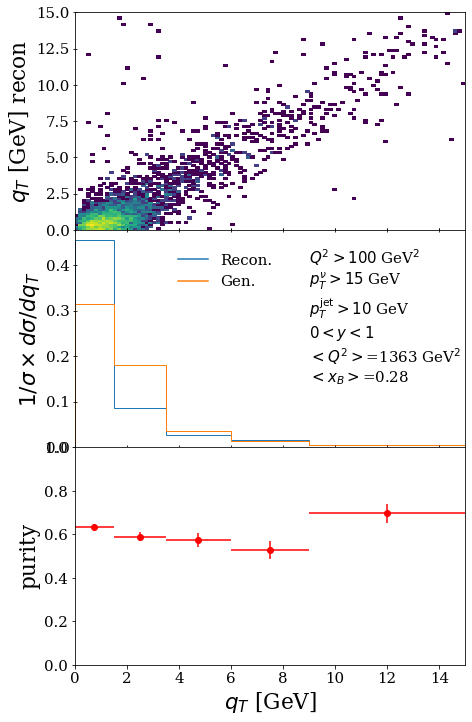

In [17]:
#fig3()
#plt.savefig("images/qT.png")
#fig3(partitions = [0,1.5,3.25,5.5,8,10.5])
#plt.savefig("images/qT.png")
#fig3(nupt_range=(15,50),partitions = [0,1.5,3.25,5.5,8,10.5])
#plt.savefig("images/qT.png")
#fig3(jetpt_range=(10,50),partitions = [0,1.5,3.25,5.5,8,10.5])
#plt.savefig("images/qT.png")
fig3(jetpt_range=(10,None),nupt_range=(15,None),partitions = [0,1.5,3.5,6,9,15])
#fig3(jetpt_range=(10,None),nupt_range=(15,None),partitions = [0,1.5,3.5,6,9,15])
#fig3(jetpt_range=(15,None),nupt_range=(15,None),partitions = [0,1.5,3.5,6,9,15])
plt.savefig("images/qT.png")

[0.6772942697113313, 0.6343906510851419, 0.5642201834862385, 0.525]


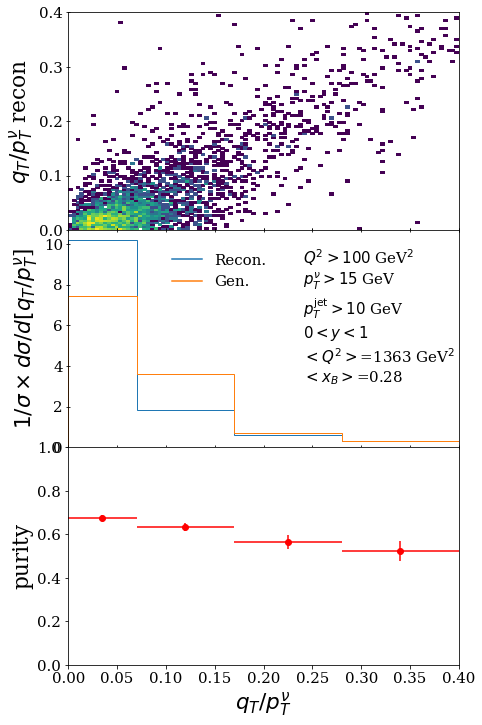

In [18]:

fig3(jetpt_range=(10,None),nupt_range=(15,None),partitions = [0,.07,.17,.28,.4],
     expr_recon='qT/JB_MET',expr_gen='Gen_qT/GenMissingET_MET',
     ylbl="$1/\\sigma\\times d\\sigma/d[q_T/p^\\nu_T$]",xlbl="$q_T/p^\\nu_T$")

plt.savefig("images/qToverpTnu.png")

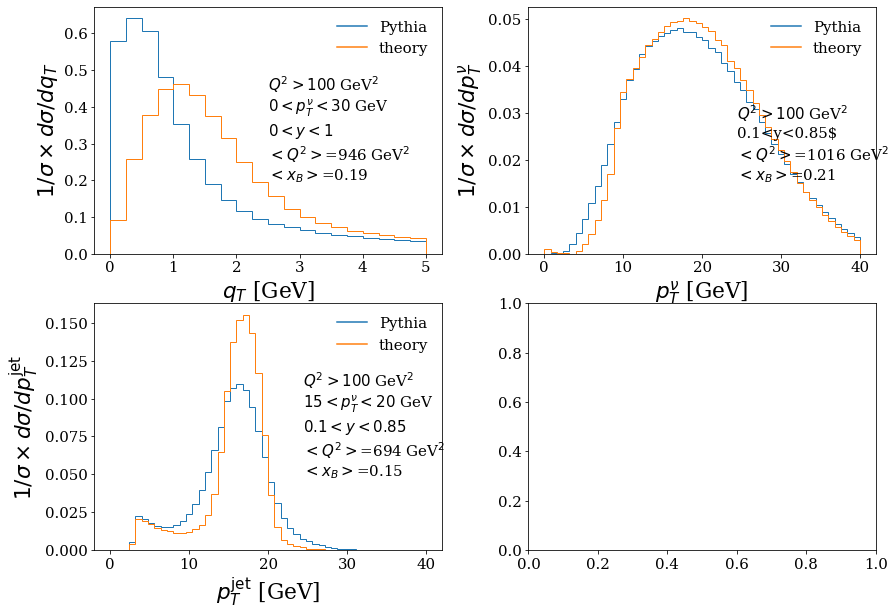

In [33]:
#corresponds to fig. 3 of NC-DIS paper.  Added an additional panel for pTjet
#q2min, y_range,pt_range = 100,(.1,.85),(15,20)
q2min,y_range,pt_range=100,(0,1),(0,30)

q = 'Gen_Q2>%s and Gen_y>%s and Gen_y<%s and Neutrino_PT>%s and Neutrino_PT<%s' %(q2min,*y_range,*pt_range)

fig,axs = plt.subplots(2,2, figsize=(14,10))
fig.subplots_adjust(wspace=0.25)
plt.sca(axs[0][0])

df = df_jets.query(q + " and Jet_PT>0 and GenJet_PT>0 and qT>0")

expr = "qT"
plt.hist(df.eval(expr),bins =20,density=True,histtype='step',range=(0,5))

expr = "Gen_qT"
plt.hist(df.eval(expr),bins =20,density=True,histtype='step',range=(0,5))
#plt.gca().set_xlim(0.05,1.2)

txt = "$Q^2>%s$ GeV$^2$\n$%s<p^{\\nu}_T<%s$ GeV\n$%s<y<%s$"%(q2min,*pt_range,*y_range)
txt+= "\n$<Q^2>$=%.0f GeV$^2$\n$<x_B>$=%.2f" %(np.mean(df.Gen_Q2),np.mean(df.Gen_x))
plt.text(0.5,0.3,txt,transform=plt.gca().transAxes)


hack_legend()

plt.gca().set_ylabel("$1/\\sigma\\times d\\sigma/dq_T$")
plt.gca().set_xlabel("$q_T$ [GeV]")


q2min, y_range,pt_range = 100,(.1,.85),(15,20)
q = 'Gen_Q2>%s and Gen_y>%s and Gen_y<%s and Neutrino_PT>%s and Neutrino_PT<%s' %(q2min,*y_range,*pt_range)
plt.sca(axs[1][0])
df = df_jets.query(q + " and Jet_PT>0 and GenJet_PT>0")
expr = "Jet_PT"
plt.hist(df.eval(expr),bins =50,density=True,histtype='step',range=(0,40))
expr = "GenJet_PT"
plt.hist(df.eval(expr),bins =50,density=True,histtype='step',range=(0,40))
#plt.gca().set_xlim(0.05,1.2)
txt = "$Q^2>%s$ GeV$^2$\n$%s<p^{\\nu}_T<%s$ GeV\n$%s<y<%s$"%(q2min,*pt_range,*y_range)
txt+= "\n$<Q^2>$=%.0f GeV$^2$\n$<x_B>$=%.2f" %(np.mean(df.Gen_Q2),np.mean(df.Gen_x))
plt.text(0.6,0.3,txt,transform=plt.gca().transAxes)
hack_legend()
plt.gca().set_ylabel("$1/\\sigma\\times d\\sigma/dp^{\\mathrm{jet}}_T$")
plt.gca().set_xlabel("$p^{\\mathrm{jet}}_T$ [GeV]")



plt.sca(axs[0][1])
q2min, y_range = 100,(.1,.85)
q = 'Gen_Q2>%s and Gen_y>%s and Gen_y<%s' %(q2min,*y_range)
df = df_jets.query(q + " and Jet_PT>0 and GenJet_PT>0")
expr = "MissingET_MET"
plt.hist(df.eval(expr),bins =50,density=True,histtype='step',range=(0,40))
expr = "Neutrino_PT"
plt.hist(df.eval(expr),bins =50,density=True,histtype='step',range=(0,40))
#plt.gca().set_xlim(0.05,1.2)
txt = "$Q^2>%s$ GeV$^2$\n%s<y<%s$"%(q2min,*y_range)
txt+= "\n$<Q^2>$=%.0f GeV$^2$\n$<x_B>$=%.2f" %(np.mean(df.Gen_Q2),np.mean(df.Gen_x))
plt.text(0.6,0.3,txt,transform=plt.gca().transAxes)
hack_legend()
plt.gca().set_ylabel("$1/\\sigma\\times d\\sigma/dp^{\\nu}_T$")
plt.gca().set_xlabel("$p^{\\nu}_T$ [GeV]")





plt.savefig("images/qt_and_pt.png")


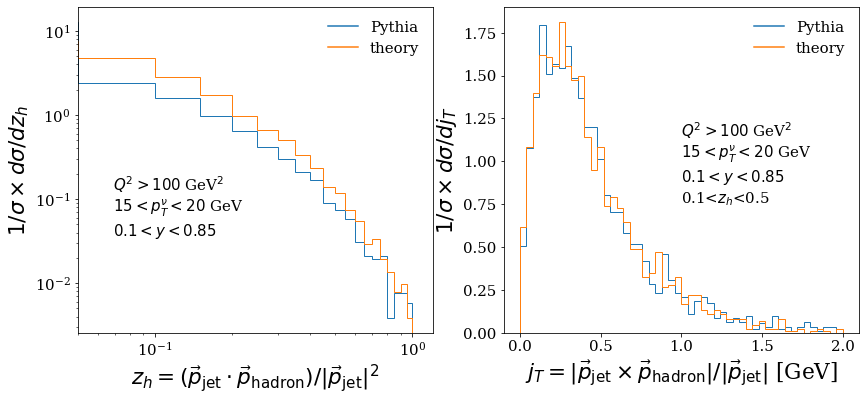

In [19]:
# Corresponds to fig4 of NC-DIS paper
q2min, y_range,pt_range = 100,(.1,.85),(15,20)
zh_range=0.1,0.5

q = 'Gen_Q2>%s and Gen_y>%s and Gen_y<%s and Neutrino_PT>%s and Neutrino_PT<%s' %(q2min,*y_range,*pt_range)

fig,axs = plt.subplots(1,2, figsize=(14,6))

plt.sca(axs[0])
plt.hist(df_hadrons.query(q).Hadron_Zh,bins =20,density=True,histtype='step',range=(0,1))
plt.hist(df_hadrons.query(q).GenHadron_Zh,bins =20,density=True,histtype='step',range=(0,1))
plt.gca().set_xlim(0.05,1.2)
plt.gca().set_yscale('log')
plt.gca().set_xscale('log')

txt = "$Q^2>%s$ GeV$^2$\n$%s<p^{\\nu}_T<%s$ GeV\n$%s<y<%s$"%(q2min,*pt_range,*y_range)
plt.text(0.1,0.3,txt,transform=plt.gca().transAxes)


hack_legend()

plt.gca().set_ylabel("$1/\\sigma\\times d\\sigma/dz_h$")
plt.gca().set_xlabel("$z_h = (\\vec p_{\\mathrm{jet}}\\cdot\\vec p_{\\mathrm{hadron}})/|\\vec p_{\\mathrm{jet}}|^2$")

q+= f" and Hadron_Zh>{zh_range[0]} and Hadron_Zh<{zh_range[1]}"
plt.sca(axs[1])
plt.hist(df_hadrons.query(q).Hadron_Jt,bins =50,density='true',histtype='step',range=(0,2),label='Pythia')
plt.hist(df_hadrons.query(q).GenHadron_Jt,bins =50,density='true',histtype='step',range=(0,2))
plt.text(0.5,0.4,txt + f"\n{zh_range[0]}<$z_h$<{zh_range[1]}",transform=plt.gca().transAxes)
plt.gca().set_ylabel("$1/\\sigma\\times d\\sigma/dj_T$")
plt.gca().set_xlabel("$j_T = |\\vec p_{\\mathrm{jet}}\\times\\vec p_{\\mathrm{hadron}}|/|\\vec p_{\\mathrm{jet}}|$ [GeV]")
hack_legend()
plt.savefig("images/zh_and_jt.png")
plt.show()

<ErrorbarContainer object of 3 artists>

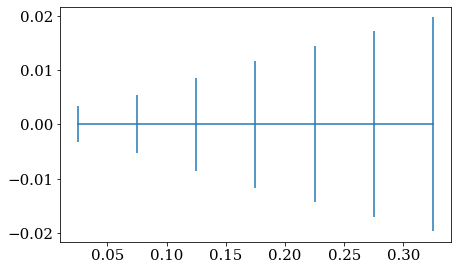

In [35]:
df = df_jets.query("Jet_PT>10 and qT>0 and MissingET_MET>0")

partitions = np.arange(0,.4,.05)
x = []
y = []
dy = []
dx = []        
for j in range(len(partitions)-1):
    n = len(df.query(f"qT/MissingET_MET>{partitions[j]} and qT/MissingET_MET<{partitions[j+1]}"))
    xmid=(partitions[j]+partitions[j+1])/2
    if n>0:
        x.append(xmid)
        dx.append(0)
        y.append(0)#arbitrary value...
        dy.append(np.sqrt(2)/(.7*np.sqrt(n)))
plt.errorbar(x,y,dy,dx)

210974
353371
861830


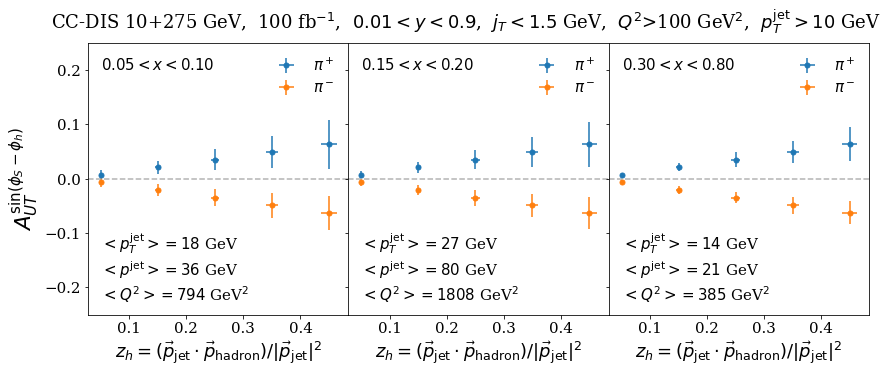

In [41]:
#corresponds to fig6 of NC-DIS paper (but with split pi+-)
jetptmin = 10
jtmax = 1.5
q2min = 100
ymin,ymax = .01,.9





fig,axs = plt.subplots(1,3,figsize=(14,5),sharey='all')

fig.suptitle("CC-DIS 10+275 GeV,  100 fb$^{-1}$,  $%s<y<%s$,  $j_T<%s$ GeV,  $Q^2$>%s GeV$^2$,  $p_T^{\\mathrm{jet}}>%s$ GeV"%(ymin,ymax,jtmax,q2min,jetptmin),fontsize='large')
fig.subplots_adjust(wspace=0)
xranges = (.05,.1),(.15,.2),(.3,.8)

partitions = np.arange(0,0.6,.1)

for i in range(len(xranges)):
    xmin,xmax = xranges[i]
    df = df_hadrons.query(f"Gen_Q2>{q2min} and Jet_PT>{jetptmin} and Gen_x>{xmin} and Gen_x<{xmax} and Gen_y>{ymin} and Gen_y<{ymax} and abs(Hadron_PID)==211 and Hadron_Jt<{jtmax}")
    print(len(df))
    ptmean,pmean,q2mean = [np.mean(df[a]) for a in ['Jet_PT','Jet_P','Gen_Q2']]
    txt = "$<p^{\\mathrm{jet}}_T> = %.0f$ GeV\n$<p^{\\mathrm{jet}}> = %.0f$ GeV\n$<Q^2> = %.0f$ GeV$^2$"%(ptmean,pmean,q2mean)
    plt.text(0.05,0.05,txt,transform=plt.gca().transAxes)
    
    for pid in 211,-211:
        plt.sca(axs[i])
        x = []
        y = []
        dy = []
        dx = []
        for j in range(len(partitions)-1):
            n = len(df.query(f"Hadron_PID=={pid} and Hadron_Zh>{partitions[j]} and Hadron_Zh<{partitions[j+1]}"))
            xmid=(partitions[j]+partitions[j+1])/2
            x.append(xmid)
            dx.append(.03*xmid)
            y.append(xmid*np.sign(pid)*.07/.5)#arbitrary value...
            dy.append(np.sqrt(2)/(.7*np.sqrt(n)))
        plt.errorbar(x,y,dy,dx,marker='o',linestyle='',markersize=5,label='$\\pi^%s$'%('+' if pid>0 else '-'))
    plt.gca().set_ylim(-.25,.25)
   
    txt = "$%.2f<x<%.2f$"%(xmin,xmax)
    plt.text(0.05,0.9,txt,transform=plt.gca().transAxes)
    plt.axhline(0,color='0.7',linestyle='--')
    plt.legend(loc='upper right',framealpha=0)
    plt.gca().set_xlabel("$z_h = (\\vec p_{\\mathrm{jet}}\\cdot\\vec p_{\\mathrm{hadron}})/|\\vec p_{\\mathrm{jet}}|^2$",fontsize='large')
axs[0].set_ylabel("$A^{\\sin(\\phi_S-\\phi_h)}_{UT}$")
plt.show()

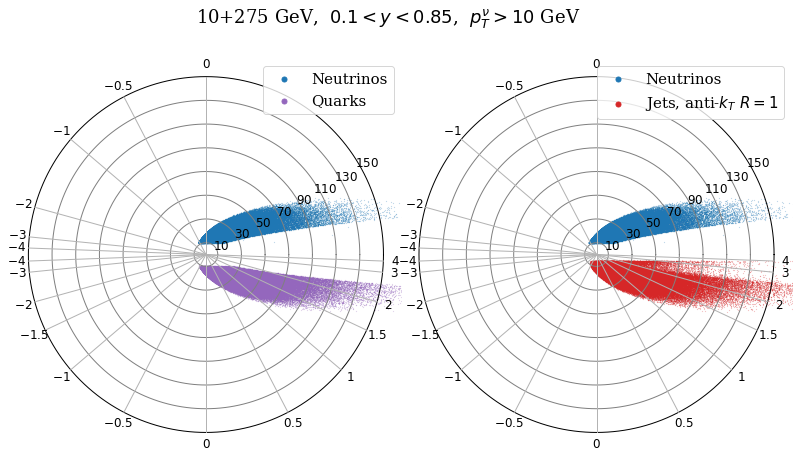

In [42]:
#corresponds to fig7 of paper
def theta_from_eta(eta):
    return 2*np.arctan(np.exp(-eta))

def eta_p_plot():
    mx = 150
    step = 20
    thetas = np.arange(0,2*np.pi+np.pi/100,np.pi/100)
    for r in np.arange(10,mx,step):
        plt.plot(r*np.cos(thetas),r*np.sin(thetas),color='0.5',linewidth=1)
        theta0 = 0.5
        plt.text((r+step/4)*np.cos(theta0), (r+step/4)*np.sin(theta0), "$%s$"%r,horizontalalignment='center',
                                                verticalalignment='center',fontsize=12)
    r = mx
    plt.plot(r*np.cos(thetas),r*np.sin(thetas),color='k',linewidth=1)
    plt.text((mx+step/4)*np.cos(theta0), (mx+step/2)*np.sin(theta0), "$%s$"%r,horizontalalignment='center',
                                                verticalalignment='center',fontsize=12)
    
    for eta in (-4,-3,-2,-1,-0.5,0):
        theta = theta_from_eta(eta)
        plt.plot([0,mx*np.cos(theta)], [0,mx*np.sin(theta)],color='0.7',linewidth=1)
        plt.text((mx+step/2)*np.cos(theta), (mx+step/2)*np.sin(theta), "$%s$"%eta,horizontalalignment='center',
                                                verticalalignment='center',fontsize=12)
        
    for eta in (-4,-3,-2,-1.5, -1,-0.5,0,0.5, 1,1.5, 2, 3,4):
        theta = theta_from_eta(eta)
        plt.plot([0,mx*np.cos(theta)], [0,-mx*np.sin(theta)],color='0.7',linewidth=1)
        plt.text((mx+step/2)*np.cos(theta), (mx+step/2)*np.sin(-theta), "$%s$"%eta,horizontalalignment='center',
                                                verticalalignment='center',fontsize=12)
    plt.gca().axis('off')
    plt.gca().set_xlim(-mx*1.1,mx*1.1)
    plt.gca().set_ylim(-mx*1.1,mx*1.1)
def scatter_eta_p(df, eta_expr, pt_expr,n=100000,ysign=1,label=None,color=None):
    theta = theta_from_eta(df.eval(eta_expr))[:n]
    p = (df.eval(pt_expr)/np.sin(theta))[:n]
    plt.scatter(p*np.cos(theta), p*np.sin(theta)*ysign,.01,label=label,color=color,)

fig,axs = plt.subplots(1,2, figsize=(14,7*180/175))
fig.subplots_adjust(hspace=0,wspace=0)
plt.sca(axs[0])
eta_p_plot()

yerange = .1,.85
nu_pt_min = 10
q = "Gen_y>%s and Gen_y<%s and Neutrino_PT>%s"%(*yerange,nu_pt_min)
df = df_nu.query(q)
scatter_eta_p(df, "Neutrino_Eta","Neutrino_PT",label='Neutrinos')
scatter_eta_p(df, "Quark_Eta","Quark_PT",ysign=-1,label="Quarks",color='tab:purple')
#scatter_eta_p(df_jets.query("GenJet_PT>0 and "+ q), "GenJet_Eta","GenJet_PT",ysign=-1000,label="Jets, anti-$k_T$ $R>0$",color='tab:red')
plt.legend(loc='upper right',markerscale=50)
plt.sca(axs[1])
eta_p_plot()
scatter_eta_p(df, "Neutrino_Eta","Neutrino_PT",label='Neutrinos')
scatter_eta_p(df_jets.query("GenJet_PT>5 and "+ q), "GenJet_Eta","GenJet_PT",ysign=-1,label = 'Jets, anti-$k_T$ $R=1$',color='tab:red')
plt.legend(loc='upper right',markerscale=50)
fig.suptitle("10+275 GeV,  $%s<y<%s$,  $p^{\\nu}_T>%s$ GeV"%(*yerange,nu_pt_min))
fig.savefig("images/nu_quark_jet_eta_p.png",bbox_inches='tight')
del df

In [43]:
#expr = "sqrt(GenMissingET_MET**2+GenJet_PT**2+2*GenMissingET_MET*GenJet_PT*cos(GenJet_Phi-GenMissingET_Phi))/GenMissingET_MET"
#expr = expr.replace("Gen","") + "-"+ "QuarkI_PT/Neutrino_PT"
#resolution_plot(expr, "$q_T/p^\\nu_T$ resolution","gen. $E_{\\mathrm{jet}}$ (GeV)", "GenJet_E",condition='GenJet_E>20')

In [44]:
# fig 8 is event display (not included here)

In [88]:
#following the style of the neutral currents paper
def resolution_plot2(yexpr, ylbl,xlbl="generated jet energy [GeV]", xexpr="GenJet_E", 
                     condition = None,nbins=20,xrange=None,axs=None,makeLegend=True,
                    include_gauss=True):
    df = df_rg.query("Jet_PT>0 and GenJet_PT>10 and Jet_E>0")
    if condition is not None:
        df = df.query(condition)
    if axs == None:
        fig,axs = plt.subplots(1,1, figsize=(7,7/golden))
    
    xv = df.eval(xexpr)
    yv = df.eval(yexpr)
    
    if xrange == None:
        mn,mx = xv.quantile(.03),xv.quantile(.97)
        if mn > 0 and mn < mx*.12:
            mn = 0
    else :
        mn,mx = xrange
    
    ymn = yv.quantile(.03)
    ymx = yv.quantile(.97)
    
    if(ymn>-.1*ymx):
        ymn = -.1*ymx
    #df = df[(yv>ymn)&(yv<ymx)]
    x,y,dy,ystd,dystd = [],[],[],[],[]
    for i in range(1,nbins):
        
        df_slice = df.query("%s>%s and %s<%s" \
                               %(xexpr,i*(mx-mn)/nbins+mn,xexpr,(i+1)*(mx-mn)/nbins+mn))
        if len(df_slice)<3:
            continue
        x.append((i+0.5)*(mx-mn)/nbins+mn)
        if include_gauss:
            mu,sigma = misc_util.getmeanstd(df_slice,yexpr)
            y.append(mu)
            dy.append(sigma)
        a = df_slice.eval(yexpr)
        a = a[(a>a.quantile(.0001)) & (a<a.quantile(.9999))]
        ystd.append(np.mean(a))
        dystd.append(np.std(a))
    if include_gauss:
        plt.plot(x,dy,linestyle='-',marker='o',markersize=5,linewidth=2,label = "Gaussian fit")
    plt.plot(x,dystd,linestyle='-',marker='o',markersize=5,linewidth=2,label = "Standard deviation")
    if makeLegend:
        plt.legend(title='anti-$k_T$ $R$=1 jets',framealpha=0)
    plt.gca().set_ylabel(ylbl)
    plt.gca().set_xlabel(xlbl)
    plt.gca().set_ylim(0)
    #plt.grid(linestyle=':')
phistr = lambda expr : "(XXX - 2*3.141592653589793*(XXX>3.141592653589793) + 2*3.141592653589793*(XXX<-3.141592653589793))*180/3.141592653589793".replace("XXX",expr)

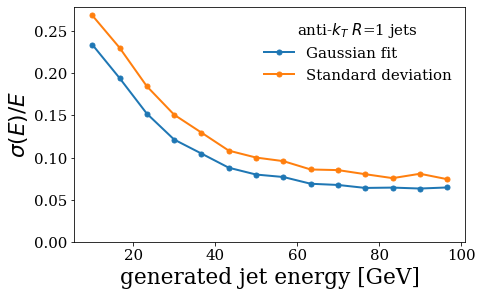

In [89]:
#corresponds to fig 9 of NC DIS paper
resolution_plot2("(GenJet_E-Jet_E)/GenJet_E", "$\\sigma(E)/E$",nbins=15,xrange=(0,100))
plt.savefig("images/jetE_vs_Eres_resolution_for_paper.png")
plt.show()
#expr = "sqrt(MissingET_MET**2+Jet_PT**2+2*MissingET_MET*Jet_PT*cos(Jet_Phi-MissingET_Phi))/MissingET_MET"
#expr2 = "QuarkI_PT/Neutrino_PT"

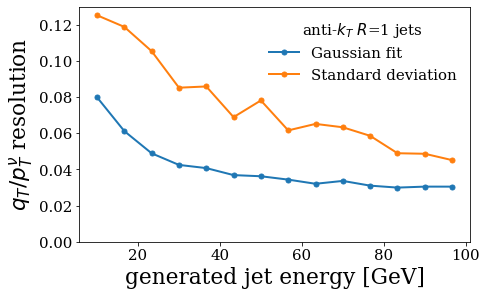

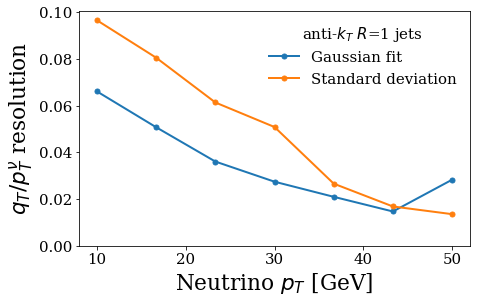

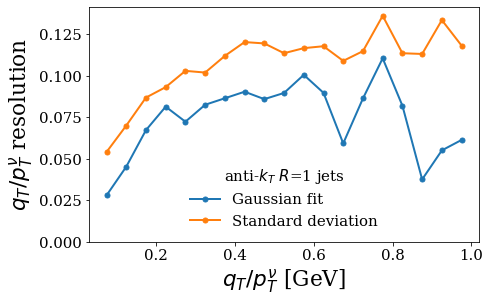

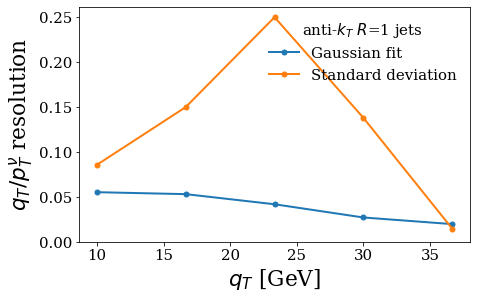

In [90]:
#corresponds to fig 10 of NC-DIS paper
expr = "qT/MissingET_MET-Gen_qT/GenMissingET_MET"

#a = df_rg.eval(expr)
#plt.hist(a[(a>a.quantile(.01))&(a<a.quantile(.99))],bins=100)
resolution_plot2(expr, "$q_T/p^{\\nu}_{T}$ resolution",condition="MissingET_MET>5 and Neutrino_PT>5",nbins=15,xrange=(0,100))
plt.savefig("images/jetE_vs_qtoverptnu_resolution_for_paper.png")
plt.show()

resolution_plot2(expr, "$q_T/p^{\\nu}_{T}$ resolution",xlbl="Neutrino $p_T$ [GeV]", xexpr="Neutrino_PT",condition="MissingET_MET>10 and Neutrino_PT>10",nbins=15,xrange=(0,100))
plt.savefig("images/nuPT_vs_qtoverptnu_resolution_for_paper.png")
plt.show()

resolution_plot2(expr, "$q_T/p^{\\nu}_{T}$ resolution",xlbl="$q_T/p^\\nu_T$ [GeV]", xexpr="Gen_qT/Neutrino_PT",condition="MissingET_MET>10 and Neutrino_PT>10",nbins=20,xrange=(0,1))
plt.savefig("images/qtovernuPT_vs_qtoverptnu_resolution_for_paper.png")
plt.show()

resolution_plot2(expr, "$q_T/p^{\\nu}_{T}$ resolution",xlbl="$q_T$ [GeV]", xexpr="qT",condition="MissingET_MET>20 and Neutrino_PT>20 and Neutrino_PT==GenMissingET_MET",nbins=15,xrange=(0,100))
plt.savefig("images/qt_vs_qtoverptnu_resolution_for_paper.png")
plt.show()

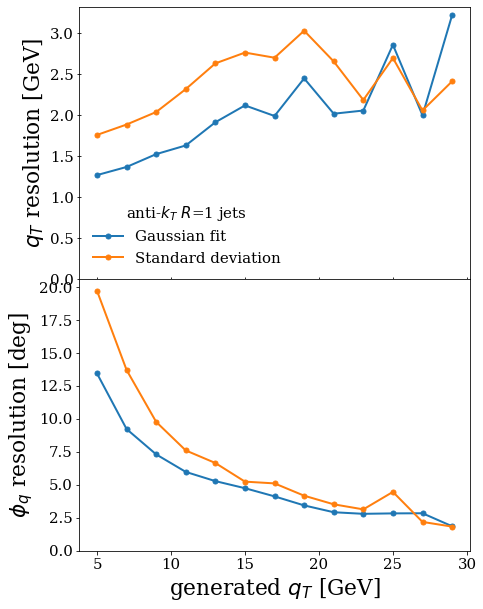

In [91]:
#alternative version of fig 10 of NC-DIS paper


fig,axs = plt.subplots(2,1,figsize=(7,10),sharex='all')
fig.subplots_adjust(hspace=0)
plt.sca(axs[0])
axs[0].tick_params(bottom=True,direction='inout')
resolution_plot2("(qT-Gen_qT)", "$q_T$ resolution [GeV]",xlbl="generated $q_T$ [GeV]", xexpr="Gen_qT",condition="MissingET_MET>5 and Neutrino_PT>5",nbins=14,xrange=(2,30),axs=axs[0])
plt.sca(axs[1])
resolution_plot2("((qT_Phi-Gen_qT_Phi)+2*3.14159*(qT_Phi-Gen_qT_Phi<-3.14159)-2*3.14159*(qT_Phi-Gen_qT_Phi>3.14159))*180/3.14159", "$\\phi_q$ resolution [deg]",xlbl="generated $q_T$ [GeV]", 
                 xexpr="Gen_qT",condition="MissingET_MET>5 and Neutrino_PT>5",nbins=14,xrange=(2,30),axs=axs[0],makeLegend=False)
plt.savefig("images/qt_vs_qt_and_phi_q_resolution_for_paper.png")
plt.show()

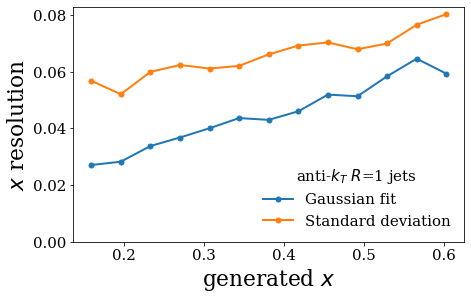

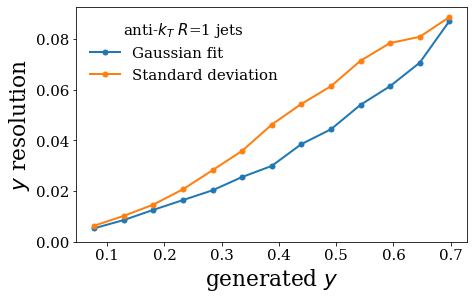

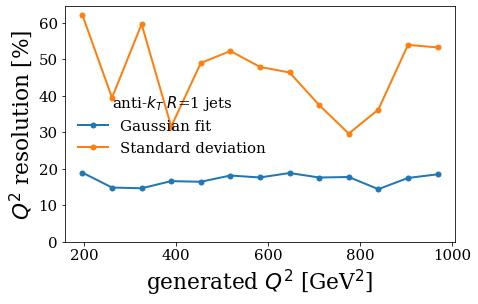

In [92]:
#fig,axs = plt.subplots(2,1,figsize=(7,10),sharex='all')
#fig.subplots_adjust(hspace=0)
#plt.sca(axs[0])
#axs[0].tick_params(bottom=True,direction='inout')
resolution_plot2("(JB_x-Gen_x)", "$x$ resolution",xlbl="generated $x$", 
                 xexpr="Gen_x",condition="MissingET_MET>15 and JB_x>0 and JB_x<1.0",
                 nbins=14,
                    include_gauss=True)
plt.savefig("images/x_resolution_for_paper.png")
plt.show()

resolution_plot2("(JB_y-Gen_y)", "$y$ resolution",xlbl="generated $y$", 
                 xexpr="Gen_y",condition="MissingET_MET>15 and JB_x>0 and JB_x<1.0",
                 nbins=14,
                    include_gauss=True)
plt.savefig("images/y_resolution_for_paper.png")
plt.show()

resolution_plot2("100*(JB_Q2-Gen_Q2)/Gen_Q2", "$Q^2$ resolution [%]",xlbl="generated $Q^2$ [GeV$^2$]", 
                 xexpr="Gen_Q2",condition="MissingET_MET>15 and JB_x>0 and JB_x<1.0",
                 nbins=14,xrange=(100,1000),
                    include_gauss=True)
plt.savefig("images/Q2_resolution_for_paper.png")
plt.show()


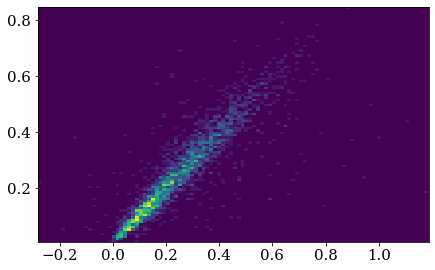

In [45]:
plt.hist2d(df_rg.query('JB_x>-.3 and JB_x<1.3').JB_x,
           df_rg.query('JB_x>-.3 and JB_x<1.3').Gen_x,bins=100)
plt.show()

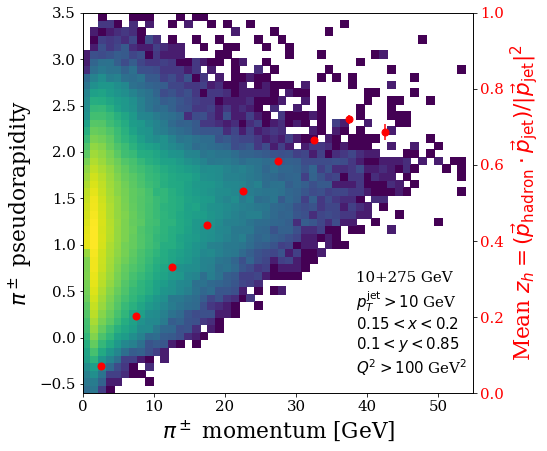

In [12]:
# Corresponds to fig11 of NC-DIS paper
import matplotlib as mpl
jetptmin = 10
q2min = 100
xmin,xmax = .15,.20
ymin,ymax = .1,.85
fig,ax = plt.subplots(1,1,figsize=(7,7),sharex='all')
df = df_hadrons.query(f"Gen_Q2>{q2min} and Jet_PT>{jetptmin} and Gen_x>{xmin} and Gen_x<{xmax} and Gen_y>{ymin} and Gen_y<{ymax} and abs(Hadron_PID)==211")

plt.sca(ax)
plt.hist2d(df.Hadron_P,df.Hadron_Eta, 
               bins=50, norm=mpl.colors.LogNorm(),range=((0,55),(-.6,3.5)))
plt.text(0.7,0.05,"10+275 GeV\n$p_T^{\\mathrm{jet}}>"+str(jetptmin)+\
         "$ GeV\n$"+str(xmin)+"<x<" + str(xmax) + "$\n$" + str(ymin) + "<y<"+str(ymax)+"$\n$Q^2>" + str(q2min)+"$ GeV$^2$",
         transform=plt.gca().transAxes)

plt.gca().set_xlabel("$\\pi^\\pm$ momentum [GeV]")
plt.gca().set_ylabel("$\\pi^\\pm$ pseudorapidity")

ax2 = ax.twinx()
plt.sca(ax2)
ax2.set_ylim(0,1)

ax2.set_ylabel(\
    "Mean $z_h = (\\vec p_{\\mathrm{hadron}}\\cdot\\vec p_{\\mathrm{jet}})/|\\vec p_{\\mathrm{jet}}|^2$",
               color='r')
ax2.tick_params(labelcolor='r')

partitions = np.arange(0,50,5)
x = []
y = []
dy = []
for i in range(len(partitions[:-1])):
    dfs = df.query(f"Hadron_P>{partitions[i]} and  Hadron_P<{partitions[i+1]}")
    x.append((partitions[i]+partitions[i+1])/2)
    y.append(np.mean(dfs.Hadron_Zh))
    dy.append(np.std(dfs.Hadron_Zh)/np.sqrt(len(dfs)))
    del dfs
plt.errorbar(x,y,dy,color='r',marker='o',linestyle ='',markersize=7)
plt.savefig("images/hadron_momentum_pseudorapidity_and_zh.png",bbox_inches='tight')
plt.show()

<ipython-input-118-f8e8f1282b85>:13: RuntimeWarning: invalid value encountered in true_divide
  axs[1].errorbar(x,r/g,drat, color='g',marker='o', label='gen.')


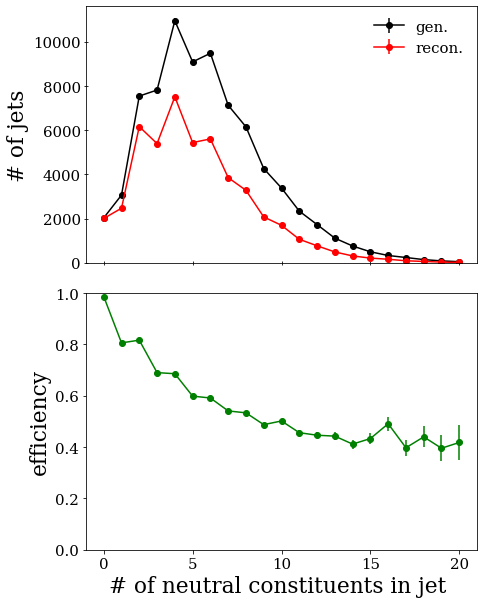

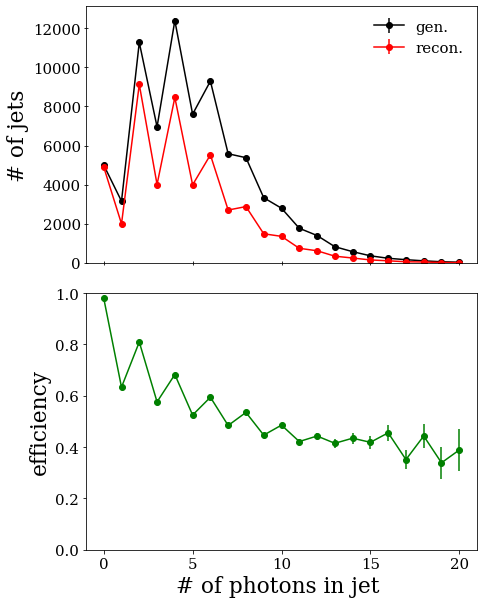

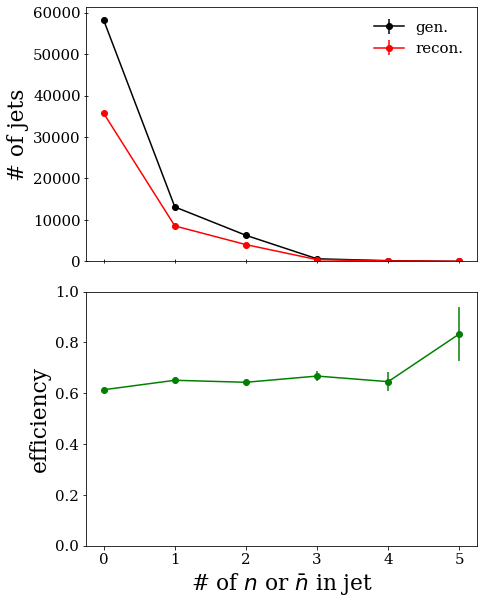

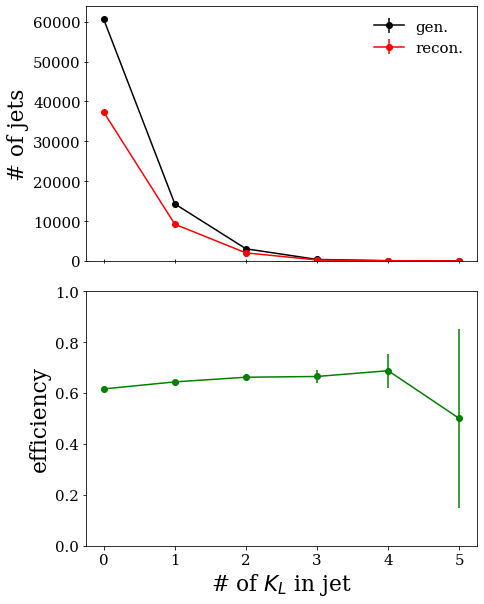

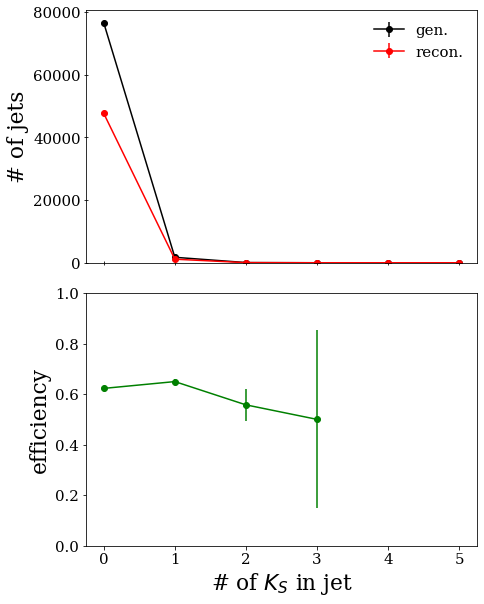

In [118]:
def efficiency_vs(xvar,xlabel,bins = dict(bins=np.linspace(-0.5,20.5,22))):
    df = df_jets.query('GenJet_PT>10')
    fig,axs = plt.subplots(2,1, figsize=(7,14/golden),sharex='all')
    r,x = np.histogram(df.query('Jet_PT>0').eval(xvar),**bins)
    g,x = np.histogram(df.eval(xvar),**bins)
    x = (x[:-1]+x[1:])/2
    axs[0].errorbar(x,g,np.sqrt(g), color='k',marker='o', label='gen.')
    axs[0].errorbar(x,r,np.sqrt(r), color='r',marker='o', label='recon.')
    axs[0].legend(framealpha=0)
    axs[0].set_ylabel('# of jets')
    axs[0].set_ylim(0)
    drat = np.sqrt(r*(g-r))/(g**(3/2)+.01)
    axs[1].errorbar(x,r/g,drat, color='g',marker='o', label='gen.')
    axs[1].set_ylabel('efficiency')
    axs[1].set_ylim(0, 1)
    #axs[0].set_xlabel('# of neutral hadrons in jet ')
    axs[1].set_xlabel(xlabel)
    fig.tight_layout()
    axs[0].tick_params(bottom=True,direction='inout')

efficiency_vs("GenJet_NNeutrals","# of neutral constituents in jet ")
plt.savefig('images/efficiency_vs_nneutral.png')
efficiency_vs("GenJet_n_22","$n_{\\gamma}$")
plt.savefig('images/efficiency_vs_ngamma.png')
efficiency_vs("GenJet_n_2112+GenJet_n_m2112",
              "# of $n$ or $\\bar n$ in jet ",
             bins = dict(bins=np.linspace(-0.5,5.5,7)))
plt.savefig('images/efficiency_vs_n_nbar.png')
efficiency_vs("GenJet_n_130",
              "# of $K_L$ in jet ",
             bins = dict(bins=np.linspace(-0.5,5.5,7)))
plt.savefig('images/efficiency_vs_KL.png')
efficiency_vs("GenJet_n_310",
              "# of $K_S$ in jet ",
             bins = dict(bins=np.linspace(-0.5,5.5,7)))
plt.savefig('images/efficiency_vs_KS.png')

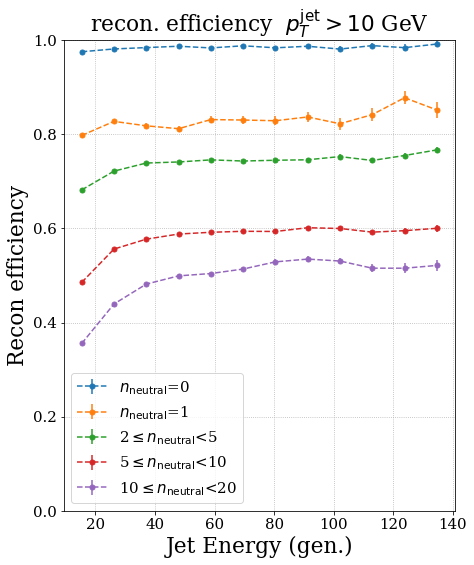

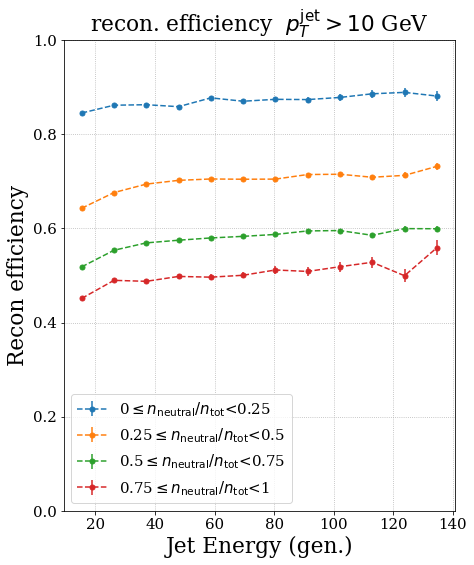

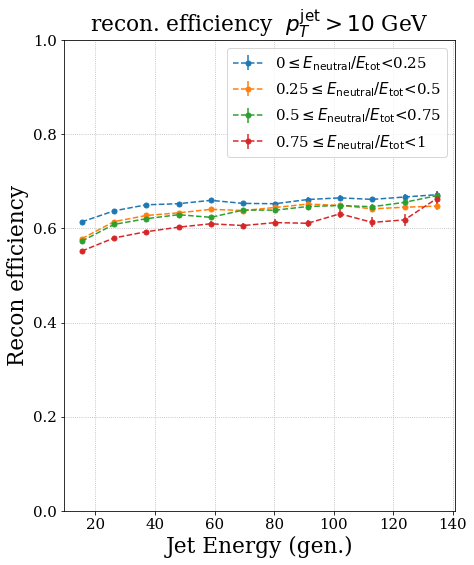

In [22]:

def efficiency_plot(xvar = 'GenJet_NNeutrals',
            xlbl = '$n_{\\mathrm{neutral}}$',
        partitions = [0,1,2,4, 20]):
    df = df_jets
    fig,axs = plt.subplots(1,1, figsize=(7,14/golden),sharex='all')
    for j in range(len(partitions)-1):
        x,y,dy = [],[],[]
        lbl = f'{partitions[j]}$\leq${xlbl}<{partitions[j+1]}'
        dfj = df.query(f"GenJet_PT>10 and {xvar} >= {partitions[j]} and {xvar} < {partitions[j+1]}")
        v = dfj.eval(xvar)[:1000]
        if np.std(v) == 0:
            mean = np.mean(v)
            if mean%1 == 0:
                mean = str(int(mean))
            lbl = f"{xlbl}={mean}"
        E = np.linspace(10, 140,(140-15)//10+1)
        for i in range(len(E)-1):

            df_slice = dfj.query(f"GenJet_E>{E[i]} and GenJet_E<{E[i+1]}")

            n = len(df_slice.query("Jet_PT>0")) #numerator: count gen jets that have a recon jet
            d = len(df_slice) #denominator:  count just the gen jets.  
            if(n>5):
                x.append((E[i]+E[i+1])/2)
                y.append(n/d)
                dy.append(np.sqrt(n*(d-n))/max(d**(3/2),1))
            del df_slice
        plt.errorbar(x,y,dy,linestyle='--',marker='o',markersize=5, label=lbl)

    plt.gca().legend(ncol=1)
    plt.gca().set_ylabel("Recon efficiency")
    plt.gca().set_xlabel("Jet Energy (gen.)")
    plt.grid(linestyle=':')
    plt.gca().set_title("recon. efficiency  $p^{\\mathrm{jet}}_T>10$ GeV")
    plt.gca().set_ylim(0,1)

efficiency_plot(xvar = 'GenJet_NNeutrals',
            xlbl = '$n_{\\mathrm{neutral}}$',
        partitions = [0,1,2,5,10,20])
plt.savefig("images/Egen_vs_efficiency_nneutral.png",bbox_inches='tight')
plt.show()

efficiency_plot(xvar = 'GenJet_NNeutrals/(GenJet_NNeutrals+GenJet_NCharged)',
            xlbl = '$n_{\\mathrm{neutral}}/n_{\\mathrm{tot}}$',
        partitions = [0,0.25,0.5,0.75, 1])
plt.savefig("images/Egen_vs_efficiency_nneutral_frac.png",bbox_inches='tight')
plt.show()

efficiency_plot(xvar = 'GenJet_NeutralEnergyFraction',
            xlbl = '$E_{\\mathrm{neutral}}/E_{\\mathrm{tot}}$',
        partitions = [0,0.25,0.5,0.75, 1])
plt.savefig("images/Egen_vs_efficiency_Eneutral_frac.png",bbox_inches='tight')
plt.show()

# now for diagnostic plots

(array([295616., 427417., 374811., 321895., 274866., 239191., 207089.,
        182482., 162385., 144469., 129574., 117381., 106205.,  95661.,
         87249.,  79468.,  73722.,  67428.,  62133.,  57279.,  52981.,
         49170.,  45850.,  42532.,  39895.,  37641.,  35181.,  32851.,
         30630.,  29455.,  27560.,  25782.,  24477.,  23193.,  21555.,
         20850.,  19831.,  18952.,  17733.,  16986.,  15945.,  15404.,
         14683.,  14054.,  13423.,  12717.,  12300.,  11715.,  11370.,
         10699.,  10440.,   9648.,   9481.,   9106.,   8708.,   8519.,
          8201.,   7835.,   7638.,   7187.,   7062.,   6795.,   6403.,
          6360.,   6219.,   5818.,   5764.,   5517.,   5302.,   5296.,
          4969.,   4812.,   4798.,   4578.,   4446.,   4370.,   4219.,
          3901.,   3914.,   3854.,   3771.,   3490.,   3447.,   3339.,
          3316.,   3129.,   3085.,   3059.,   2871.,   2912.,   2785.,
          2704.,   2662.,   2650.,   2458.,   2472.,   2446.,   2262.,
      

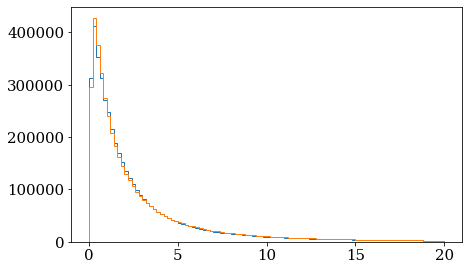

In [16]:
plt.hist(df_hadrons.query('Hadron_Charge==0').Hadron_E,histtype='step',bins=100, range=(0,20))
plt.hist(df_hadrons.query('Hadron_Charge==0').GenHadron_E,histtype='step',bins=100, range=(0,20))

In [ ]:
neuts = df_hadrons.query('Hadron_Charge==0')
plt.hist(neuts.eval('GenHadron_E-Hadron_E'),histtype='step',bins=100,range=(-10,10))
plt.show()
plt.hist(neuts.eval('Hadron_E'),histtype='step',bins=100, range=(0,1))
plt.hist(neuts.eval('GenHadron_E'),histtype='step',bins=100, range=(0,1))
plt.show()

In [27]:
print(set(neuts.eval('GenHadron_PID')))
print(len(neuts.query('GenHadron_PID ==22'))/len(neuts))

{130, -3322, 11, 13, -3312, 22, 3222, 2212, 3112, -211, 3122, 310, -321, 2112, -2112, 321, -3122, 211, -3112, -2212, -3222, 3312, -13, -11, 3322}
0.7559152235854334


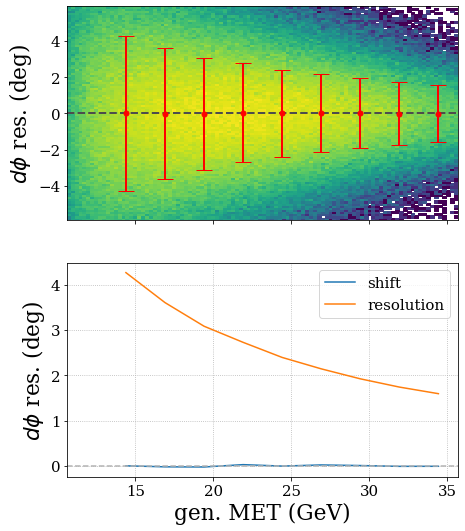

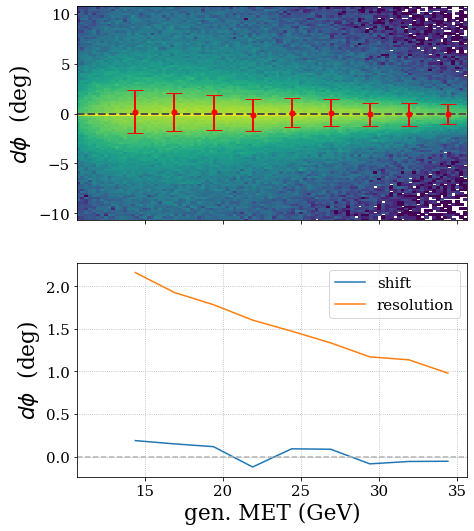

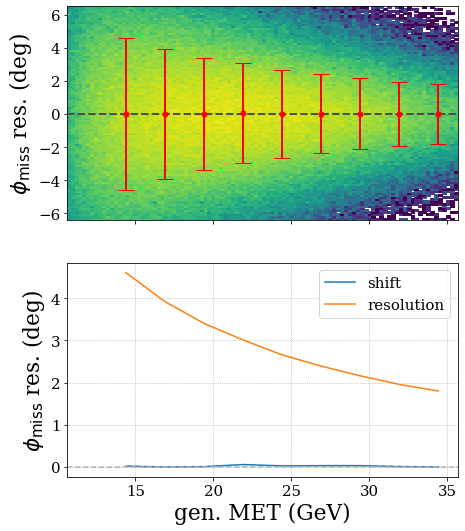

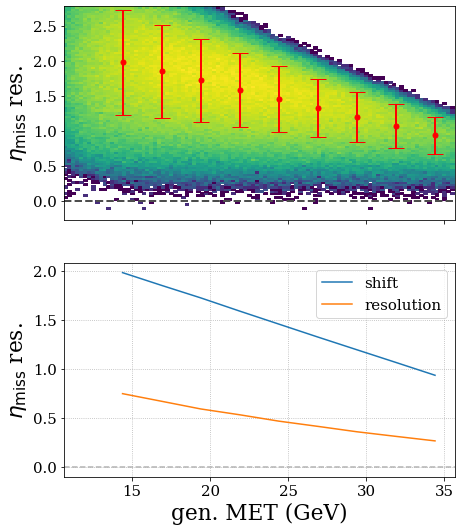

In [51]:
def resolution_plot(yexpr, ylbl,xlbl="gen. MET (GeV)", xexpr="GenMissingET_MET", condition = None):
    df = df_jets.query("Jet_PT>10 and GenJet_PT>10")
    if condition != None:
        df = df.query(condition)
    fig,axs = plt.subplots(2,1, figsize=(7,14/golden),sharex='all')
    plt.sca(axs[0])

    import matplotlib as mpl
    xv = df.eval(xexpr)
    yv = df.eval(yexpr)
    
    mn,mx = xv.quantile(.03),xv.quantile(.97)
    if mn > 0 and mn < mx*.12:
        mn = 0
    
    ymn = yv.quantile(.05)
    ymx = yv.quantile(.95)
    
    if(ymn>-.1*ymx):
        ymn = -.1*ymx
    
    plt.hist2d(xv,yv, 
               bins=100,range=([mn,mx],[ymn,ymx]), norm=mpl.colors.LogNorm())
    plt.gca().set_ylabel(ylbl)

    plt.axhline(0,linestyle='--',color='0.3',linewidth=2)
    x,y,dy = [],[],[]
    
    nbins = 10
    
    for i in range(1,nbins):
        
        df_slice = df_rg.query("%s>%s and %s<%s" \
                               %(xexpr,i*(mx-mn)/nbins+mn,xexpr,(i+1)*(mx-mn)/nbins+mn))
        if len(df_slice)<3:
            continue
        x.append((i+0.5)*(mx-mn)/nbins+mn)
        mean,std = misc_util.getmeanstd(df_slice,yexpr)
        y.append(mean)
        dy.append(std)
        del df_slice
    plt.errorbar(x,y,dy, color='r',linestyle='',marker='o',markersize=5,linewidth=2,capsize=8)
    gc.collect()

    plt.sca(axs[1])

    plt.plot(x,y,label='shift')
    plt.plot(x,dy,label='resolution')
    plt.axhline(0,linestyle='--',color='0.7')
    plt.legend()
    plt.gca().set_ylabel(ylbl)

    plt.gca().set_xlabel(xlbl)
    plt.grid(linestyle=':')
    del df
phistr = lambda expr : "(XXX - 2*3.141592653589793*(XXX>3.141592653589793) + 2*3.141592653589793*(XXX<-3.141592653589793))*180/3.141592653589793".replace("XXX",expr)


resolution_plot(phistr("MissingET_Phi-GenMissingET_Phi-Jet_Phi+GenJet_Phi"), "$d\\phi$ res. (deg)")
plt.savefig("images/MET_vs_dphi_resolution.png")


resolution_plot(phistr("MissingET_Phi-Jet_Phi+3.141592653589793"), "$d\\phi$  (deg)")
plt.savefig("images/MET_vs_dphi_recon.png")


resolution_plot(phistr("MissingET_Phi-GenMissingET_Phi"), "$\\phi_{\\mathrm{miss}}$ res. (deg)")
plt.savefig("images/MET_vs_ETphi_resolution.png")

resolution_plot("MissingET_Eta-GenMissingET_Eta", "$\\eta_{\\mathrm{miss}}$ res.")
plt.savefig("images/MET_vs_ETeta_resolution.png")

#resolution_plot("(MissingET_MET-GenMissingET_MET)*100/GenMissingET_MET", "MET res. (%)")
#plt.savefig("images/MET_vs_MET_resolution.png")

#resolution_plot(phistr("Jet_Phi-GenJet_Phi"), "$\\phi_{\\mathrm{jet}}$ res. (deg)","gen. $E_{\\mathrm{jet}}$ (GeV)", "GenJet_E")
#plt.savefig("images/Ejet_vs_jetphi_resolution.png")

#resolution_plot("Jet_Eta-GenJet_Eta", "$\\eta_{\\mathrm{jet}}$ res.","gen. $E_{\\mathrm{jet}}$ (GeV)", "GenJet_E")
#plt.savefig("images/Ejet_vs_jeteta_resolution.png")

#resolution_plot("(Jet_E-GenJet_E)*100/GenJet_E", "$E_{\\mathrm{jet}}$ res. (%)","gen. $E_{\\mathrm{jet}}$ (GeV)", "GenJet_E")
#plt.savefig("images/Ejet_vs_jetE_resolution.png")

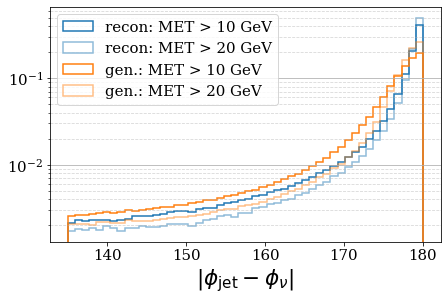

In [52]:
df = df_jets.query("Jet_PT>0")
args = dict(bins =50,histtype='step',density=True,range=(135,180),linewidth=1.5)
expr = "abs(" + phistr("MissingET_Phi-Jet_Phi")+")"
plt.hist(df.query("MissingET_MET>10").eval(expr),**args,label='recon: MET > 10 GeV',color='tab:blue')
plt.hist(df.query("MissingET_MET>20").eval(expr),**args,label='recon: MET > 20 GeV',color='tab:blue',alpha=0.5)

df = df_jets.query("GenJet_PT>0")

expr = "abs(" + phistr("GenMissingET_Phi-GenJet_Phi")+")"
plt.hist(df.query("GenMissingET_MET>10").eval(expr),**args,label='gen.: MET > 10 GeV',color='tab:orange')
plt.hist(df.query("GenMissingET_MET>20").eval(expr),**args,label='gen.: MET > 20 GeV',color='tab:orange',alpha=0.5)
plt.legend(loc='upper left')

plt.gca().set_xlabel("$|\\phi_{\\mathrm{jet}}-\\phi_{\\nu}|$")
plt.gca().set_yscale('log')
plt.savefig("images/deltaphi.png")
plt.grid(which='major',axis='y')
plt.grid(b=True,which='minor',linestyle='--',alpha=0.5,axis='y')
plt.savefig("images/deltaphi.png")
plt.show()


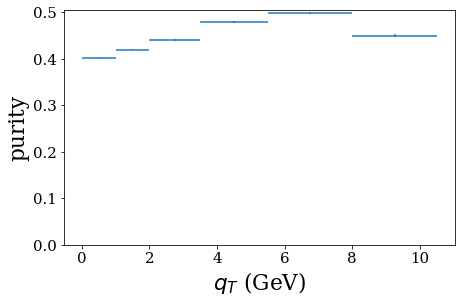

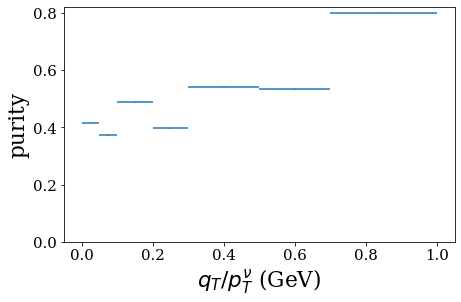

In [49]:
def purity_plot(df, expr,genExpr,partitions):
    xs = []
    ys = []
    dys = []
    dxs = []
    for i in range(len(partitions)-1):
        x=(partitions[i]+partitions[i+1])/2
        dx = (partitions[i+1]-partitions[i])/2
        num = len(df.query(f"{expr}>={partitions[i]} and {expr}<{partitions[i+1]} and {genExpr}>={partitions[i]} and {genExpr}<{partitions[i+1]}"))
        denom = len(df.query(f"{expr}>={partitions[i]} and {expr}<{partitions[i+1]}"))
        if denom == 0:
            continue
        y =num/denom
        dy = np.sqrt(((denom-num)*num)/denom**3)
        
        xs.append(x)
        ys.append(y)
        dys.append(dy)
        dxs.append(dx)
    plt.errorbar(xs,ys,dys,dxs,linestyle='')
    
    
purity_plot(df_rg.query("Jet_PT>0"),"qT","Gen_qT",[0,1,2,3.5,5.5,8,10.5])
plt.gca().set_xlabel("$q_T$ (GeV)")
plt.gca().set_ylabel("purity")   
plt.gca().set_ylim(0)
plt.savefig("images/purity_qT.png")
plt.show()
purity_plot(df_rg.query("Jet_PT>0"),"qT/MissingET_MET","Gen_qT/GenMissingET_MET",[0,0.05,0.1,0.2,0.3,0.5,0.7,1])
plt.gca().set_xlabel("$q_T/p^\\nu_T$ (GeV)")
plt.gca().set_ylabel("purity")   
plt.gca().set_ylim(0)
plt.savefig("images/purity_qToverptnu.png")

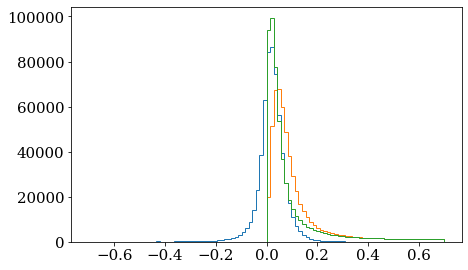

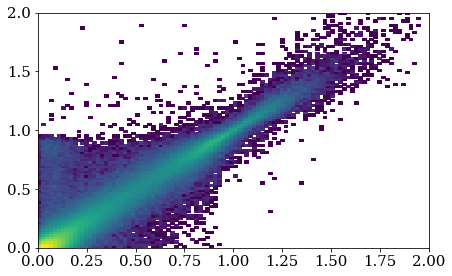

In [46]:
df = df_rg.query("Neutrino_PT>15")
expr1 = "sqrt(GenMissingET_MET**2+GenJet_PT**2+2*GenMissingET_MET*GenJet_PT*cos(GenJet_Phi-GenMissingET_Phi))/GenMissingET_MET"
expr2 = expr1.replace("Gen","")
plt.hist(df.eval(expr1+ "-("+expr2+")"), bins=100, range=(-.7,.7),histtype='step')
plt.hist(df.eval(expr1), bins=100, range=(-.7,.7),histtype='step')
plt.hist(df.eval(expr2), bins=100, range=(-.7,.7),histtype='step')
plt.show()
plt.hist2d(df.eval(expr1),df.eval(expr2),range=((0,2),(0,2)),bins=100,norm=mpl.colors.LogNorm())
plt.show()

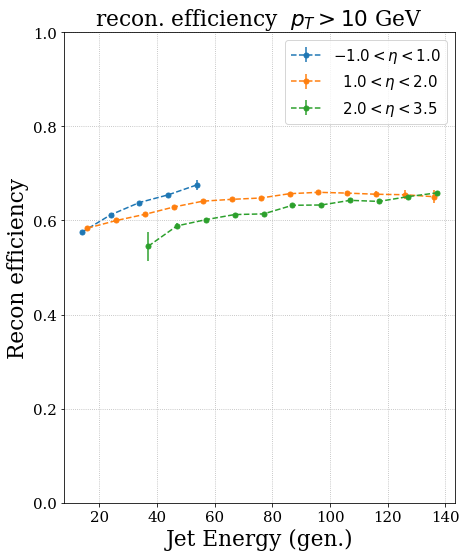

In [139]:
#etanumin,etanumax=-3.5,3.5

df = df_jets
fig,axs = plt.subplots(1,1, figsize=(7,14/golden),sharex='all')
for etarange,lbl in [(-1,1), "$-1.0<\\eta<1.0$"],[(1,2), "  $1.0<\\eta<2.0$"],[(2,3.5), "  $2.0<\\eta<3.5$"]  :
    x,y,dy = [],[],[]
    for i in range(1,14):
        
        df_slice = df.query("GenJet_E>%s and GenJet_E<%s and GenJet_Eta>%s and GenJet_Eta<%s and GenJet_PT>10" %(i*10,(i+1)*10,*etarange))
        
        n = len(df_slice.query("Jet_PT>0")) #numerator: count gen jets that have a recon jet
        d = len(df_slice) #denominator:  count just the gen jets.  
        if(n>5):
            x.append(i*10+5)
            y.append(n/d)
            dy.append(np.sqrt(n*(d-n))/max(d**(3/2),1))
        del df_slice
    plt.errorbar(np.add(x,etarange[0]),y,dy,linestyle='--',marker='o',markersize=5, label=lbl)

plt.gca().legend(ncol=1)
plt.gca().set_ylabel("Recon efficiency")
plt.gca().set_xlabel("Jet Energy (gen.)")
plt.grid(linestyle=':')
plt.gca().set_title("recon. efficiency  $p_T>10$ GeV")
plt.gca().set_ylim(0,1)

plt.savefig("images/Egen_vs_efficiency_eta.png",bbox_inches='tight')
plt.show()

In [140]:
print(list(df_jets.columns))

['Jet_PT', 'Jet_Eta', 'Jet_Phi', 'Jet_Mass', 'Jet_DeltaEta', 'Jet_DeltaPhi', 'Jet_Flavor', 'Jet_FlavorAlgo', 'Jet_FlavorPhys', 'Jet_BTag', 'Jet_BTagAlgo', 'Jet_BTagPhys', 'Jet_TauTag', 'Jet_TauWeight', 'Jet_Charge', 'Jet_EhadOverEem', 'Jet_NCharged', 'Jet_NNeutrals', 'Jet_NeutralEnergyFraction', 'Jet_ChargedEnergyFraction', 'Jet_NSubJetsTrimmed', 'Jet_NSubJetsPruned', 'Jet_NSubJetsSoftDropped', 'GenJet_PT', 'GenJet_Eta', 'GenJet_Phi', 'GenJet_Mass', 'GenJet_DeltaEta', 'GenJet_DeltaPhi', 'GenJet_Flavor', 'GenJet_FlavorAlgo', 'GenJet_FlavorPhys', 'GenJet_BTag', 'GenJet_BTagAlgo', 'GenJet_BTagPhys', 'GenJet_TauTag', 'GenJet_TauWeight', 'GenJet_Charge', 'GenJet_EhadOverEem', 'GenJet_NCharged', 'GenJet_NNeutrals', 'GenJet_NeutralEnergyFraction', 'GenJet_ChargedEnergyFraction', 'GenJet_NSubJetsTrimmed', 'GenJet_NSubJetsPruned', 'GenJet_NSubJetsSoftDropped', 'Neutrino_PID', 'Neutrino_Status', 'Neutrino_IsPU', 'Neutrino_M1', 'Neutrino_M2', 'Neutrino_D1', 'Neutrino_D2', 'Neutrino_Mass', 'Neutri

In [82]:
print(df_jets.columns)

Index(['Jet_PT', 'Jet_Eta', 'Jet_Phi', 'Jet_Mass', 'Jet_DeltaEta',
       'Jet_DeltaPhi', 'GenJet_PT', 'GenJet_Eta', 'GenJet_Phi', 'GenJet_Mass',
       'GenJet_DeltaEta', 'GenJet_DeltaPhi', 'Neutrino_PID', 'Neutrino_Status',
       'Neutrino_E', 'Neutrino_Px', 'Neutrino_Py', 'Neutrino_Pz',
       'Neutrino_PT', 'Neutrino_Eta', 'Quark_PID', 'Quark_Status', 'Quark_E',
       'Quark_Px', 'Quark_Py', 'Quark_Pz', 'Quark_PT', 'Quark_Eta',
       'MissingET_MET', 'MissingET_Eta', 'MissingET_Phi', 'GenMissingET_MET',
       'GenMissingET_Eta', 'GenMissingET_Phi', 'Event_Number', 'Gen_W2',
       'Gen_x', 'Gen_y', 'Gen_Q2', 'Hadron_PID', 'Hadron_Charge', 'Hadron_P',
       'Hadron_PT', 'Hadron_Eta', 'Hadron_Phi', 'GenHadron_PID',
       'GenHadron_Charge', 'GenHadron_P', 'GenHadron_PT', 'GenHadron_Eta',
       'GenHadron_Phi', 'Hadron_i', 'Jet_i', 'JB_MET', 'JB_Eta', 'JB_Phi',
       'JB_Q2', 'JB_x', 'JB_y', 'Jet_E', 'GenJet_E', 'Hadron_Px', 'Hadron_Py',
       'Hadron_Pz', 'GenHadron_Px', 'Ge

<ipython-input-54-348a23df6d48>:17: RuntimeWarning: invalid value encountered in true_divide
  pc = plt.pcolor(n/d)


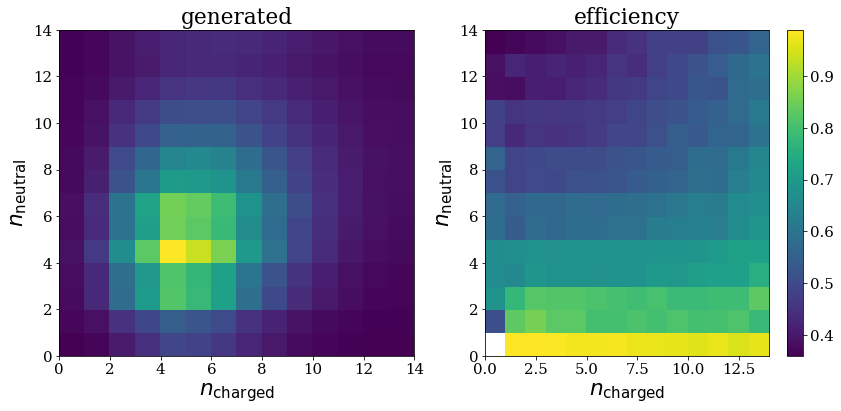

In [54]:
df = df_jets.query('GenJet_PT>10')
mx = 14
bins = mx
binning = dict(bins=mx,range=((0,mx),(0,mx)))
recon = df.query('Jet_PT>0')
n,x,y = np.histogram2d(recon.GenJet_NNeutrals,recon.GenJet_NCharged,**binning)
d,x,y = np.histogram2d(df.GenJet_NNeutrals,df.GenJet_NCharged,**binning)
fig,axs= plt.subplots(1,2,figsize=(14,6))

plt.sca(axs[0])
pc = plt.pcolor(d)
plt.gca().set_title('generated')
plt.gca().set_ylabel('$n_{\\mathrm{neutral}}$')
plt.gca().set_xlabel('$n_{\\mathrm{charged}}$')

plt.sca(axs[1])
pc = plt.pcolor(n/d)
plt.gca().set_title('efficiency')
plt.gca().set_ylabel('$n_{\\mathrm{neutral}}$')
plt.gca().set_xlabel('$n_{\\mathrm{charged}}$')

cbar = plt.colorbar(pc)
#help(cbar)
del recon
#np.histogram2d(df.GenJet_NNeutral,df.GenJet_NCharged,**binning)

(array([ 35528.,  35422.,  87628.,  76323., 106381.,  77269.,  79499.,
         53919.,  46771.,  31023.,  24620.,  15829.,  11631.,   7374.,
          8372.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15.]),
 <a list of 1 Patch objects>)

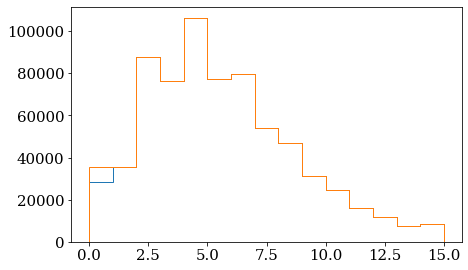

In [183]:
df = df_jets.query('Jet_PT>10')
plt.hist(df.query('GenJet_PT>0').GenJet_NNeutrals,bins=np.linspace(0,15,16),histtype='step')
plt.hist(df.GenJet_NNeutrals,bins=np.linspace(0,15,16), histtype='step')

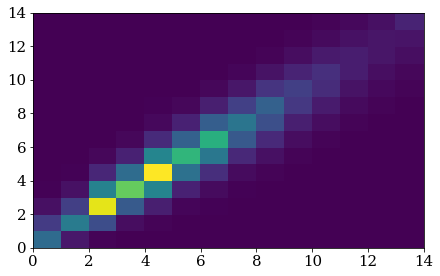

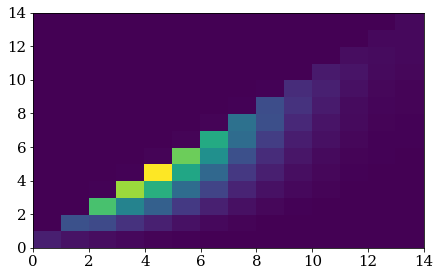

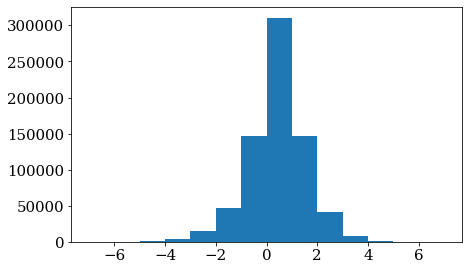

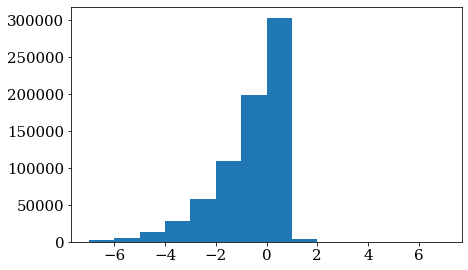

In [178]:
df = df_jets.query('GenJet_PT>10 and Jet_PT>0')
mx = 14
bins = mx
binning = dict(bins=mx,range=((0,mx),(0,mx)))
plt.hist2d(df.GenJet_NNeutrals,df.Jet_NNeutrals,**binning)
plt.show()
plt.hist2d(df.GenJet_NCharged,df.Jet_NCharged,**binning)
plt.show()

binning = dict(bins=mx,range=(-mx/2,mx/2))
plt.hist(df.Jet_NNeutrals-df.GenJet_NNeutrals,**binning)
plt.show()
plt.hist(df.Jet_NCharged-df.GenJet_NCharged,**binning)
plt.show()

In [156]:
df_jets.query('Jet_i == 0')[:30][['Jet_PT','GenJet_PT']]

,Jet_PT,GenJet_PT
0,3.343300,6.946128
1,0.000000,27.748024
2,0.000000,8.070152
3,0.000000,10.350828
5,32.800392,36.529980
9,7.273191,7.669242
11,0.000000,14.422761
12,0.000000,18.680199
13,19.032677,22.391390
19,0.000000,17.598061


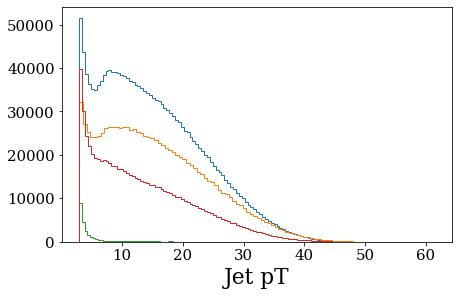

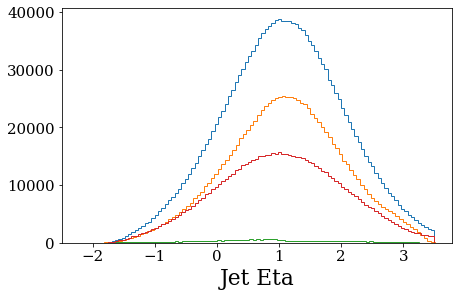

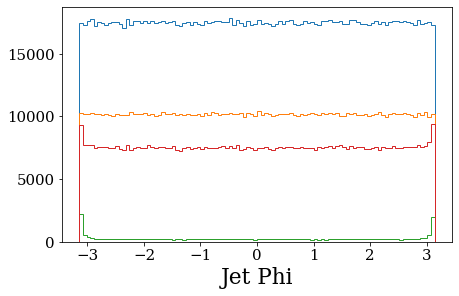

In [80]:
df = df_jets.query("GenJet_Eta<3.5 or GenJet_Eta==0")

dfg = df.query("GenJet_PT>0")
dfr = df.query("Jet_PT>0")
dfng = df.query("GenJet_PT==0")
dfnr = df.query("Jet_PT==0")



plt.hist(dfg.GenJet_PT,bins=100,histtype='step')
plt.hist(dfr.Jet_PT,bins=100,histtype='step')
plt.hist(dfng.Jet_PT,bins=100,histtype='step')
plt.hist(dfnr.GenJet_PT,bins=100,histtype='step')
plt.gca().set_xlabel("Jet pT")
plt.show()

plt.hist(dfg.GenJet_Eta,bins=100,histtype='step')
plt.hist(dfr.Jet_Eta,bins=100,histtype='step')
plt.hist(dfng.Jet_Eta,bins=100,histtype='step')
plt.hist(dfnr.GenJet_Eta,bins=100,histtype='step')
plt.gca().set_xlabel("Jet Eta")
plt.show()

plt.hist(dfg.GenJet_Phi,bins=100,histtype='step')
plt.hist(dfr.Jet_Phi,bins=100,histtype='step')
plt.hist(dfng.Jet_Phi,bins=100,histtype='step')
plt.hist(dfnr.GenJet_Phi,bins=100,histtype='step')
plt.gca().set_xlabel("Jet Phi")
plt.show()

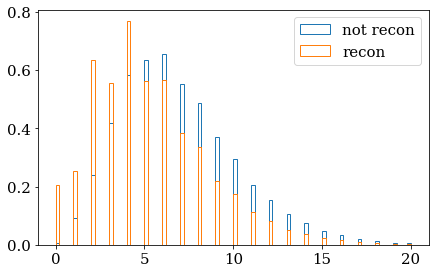

1

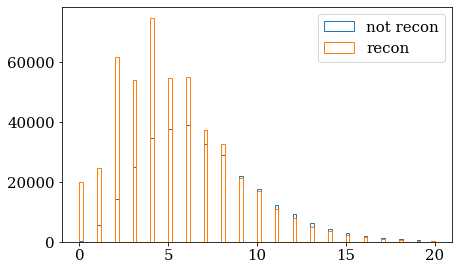

In [445]:

expr = "GenJet_NNeutrals"

dfg = df_jets.query("GenJet_PT>10 and GenJet_Eta<3.5")
dfr = dfg.query("Jet_E>0")
dfnr = dfg.query("Jet_E==0")
plt.hist(dfnr.eval(expr),bins=100,range=(0,20),histtype='step',density=True,label = "not recon")
plt.hist(dfr.eval(expr),bins=100,range=(0,20),histtype='step',density=True,label = "recon")
plt.legend()
plt.show()
plt.hist(dfnr.eval(expr),bins=100,range=(0,20),histtype='step',label = "not recon")
df = df_jets.query("Jet_E>0")
plt.hist(dfr.eval(expr),bins=100,range=(0,20),histtype='step',label = "recon")
plt.legend()
1

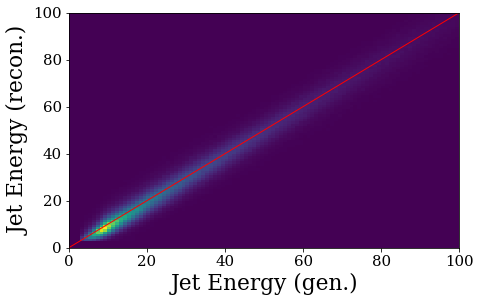

In [9]:

plt.hist2d(df_rg.GenJet_PT*np.cosh(df_rg.GenJet_Eta),df_rg.Jet_PT*np.cosh(df_rg.Jet_Eta), bins=100,range=([0,100],)*2)
plt.gca().set_xlabel("Jet Energy (gen.)")
plt.gca().set_ylabel("Jet Energy (recon.)")
plt.plot((0,100),(0,100),color='r',linewidth=1)
plt.savefig("images/Erecon_vs_Egen.png",bbox_inches='tight')
plt.show()

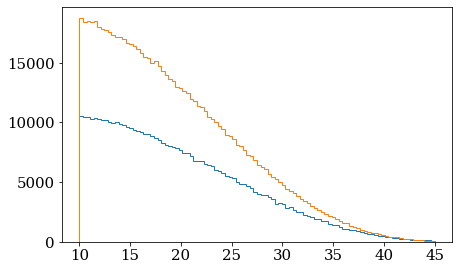

In [35]:
args = dict( bins=100, histtype='step',range=(10,45))
plt.hist(df_jets.Jet_PT,**args)
plt.hist(df_jets.GenJet_PT, **args)
plt.show()

plt.hist(df_jets.Jet_PT,**args)
plt.hist(df_jets.GenJet_PT, **args)
plt.show()

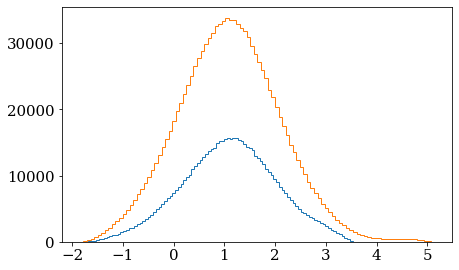

In [42]:
df = df_jets.query("GenJet_E>0")

plt.hist(df.query("Jet_E>0").Jet_Eta, bins=100,histtype='step',density=False)
plt.hist(df.GenJet_Eta, bins=100,histtype='step',density=False)
plt.show()

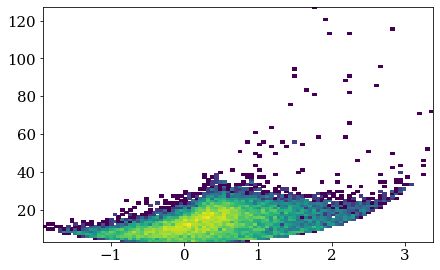

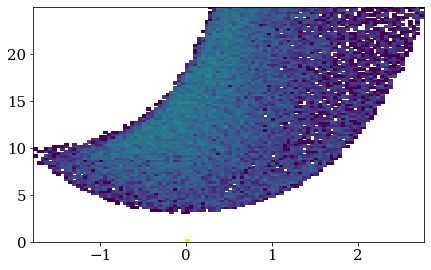

In [137]:
#df = df_jets.query("GenJet_E<25")
plt.hist2d(df.query("Jet_E>0").Jet_Eta,df.query("Jet_E>0").Jet_E, bins=100, norm=mpl.colors.LogNorm())
plt.show()
df = df_jets.query("GenJet_E<25")
plt.hist2d(df.GenJet_Eta,df.GenJet_E, bins=100, norm=mpl.colors.LogNorm())
plt.show()

In [ ]:
fig,axs = plt.subplots(2,1, figsize=(7,14/golden),sharex='all')
plt.sca(axs[0])


df = df_jets.query("GenJet_Mass>0.05")
df_rg = df.query("Jet_PT*GenJet_PT>0")
import matplotlib as mpl
plt.hist2d(df_rg.eval("GenJet_E"),df_rg.eval("(Jet_E-GenJet_E)*100/GenJet_E"), 
           bins=100,range=([0,150],[-30,30]), norm=mpl.colors.LogNorm())
plt.gca().set_ylabel("jet energy res. (%)")

plt.axhline(0,linestyle='--',color='0.3',linewidth=2)
x,y,dy = [],[],[]
for i in range(1,14):
    df_slice = df_rg.query("GenJet_E>%s and GenJet_E<%s" %(i*10,(i+1)*10))
    x.append(i*10+5)
    q = df_slice.eval("(Jet_E-GenJet_E)*100/GenJet_E")
    y.append(np.mean(q))
    dy.append(np.std(q))
plt.errorbar(x,y,dy, color='r',linestyle='',marker='o',markersize=5)


plt.sca(axs[1])

plt.plot(x,y,label='jet energy scale')
plt.plot(x,dy,label='jet energy res.')
plt.axhline(0,linestyle='--',color='0.7')
plt.legend()
plt.gca().set_ylabel("jet energy res. (%)")

plt.gca().set_xlabel("Jet Energy (gen.)")
plt.grid(linestyle=':')

plt.savefig("images/Egen_vs_resolution.png")

In [177]:
10, 275

(array([3.077e+03, 5.396e+03, 4.325e+03, 3.623e+03, 3.208e+03, 2.651e+03,
        2.438e+03, 2.224e+03, 1.850e+03, 1.768e+03, 1.642e+03, 1.427e+03,
        1.335e+03, 1.221e+03, 1.070e+03, 1.040e+03, 9.320e+02, 8.970e+02,
        8.000e+02, 7.030e+02, 7.160e+02, 6.320e+02, 5.670e+02, 5.120e+02,
        4.570e+02, 4.160e+02, 4.270e+02, 3.390e+02, 3.490e+02, 2.890e+02,
        3.050e+02, 2.600e+02, 2.460e+02, 2.290e+02, 2.090e+02, 1.920e+02,
        1.930e+02, 1.720e+02, 1.470e+02, 1.130e+02, 1.300e+02, 1.450e+02,
        9.100e+01, 9.000e+01, 8.300e+01, 9.500e+01, 7.500e+01, 8.200e+01,
        7.300e+01, 7.100e+01, 6.100e+01, 6.800e+01, 4.600e+01, 5.300e+01,
        3.700e+01, 4.300e+01, 3.000e+01, 2.900e+01, 3.400e+01, 1.900e+01,
        2.200e+01, 3.000e+01, 1.600e+01, 1.300e+01, 1.700e+01, 1.400e+01,
        1.600e+01, 1.300e+01, 1.300e+01, 1.100e+01, 9.000e+00, 1.000e+01,
        2.000e+00, 6.000e+00, 8.000e+00, 4.000e+00, 3.000e+00, 2.000e+00,
        7.000e+00, 1.000e+00, 5.000e+0

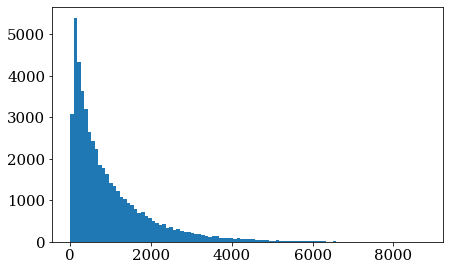

In [173]:
plt.hist(df_nu.Q2,bins=100)

(array([16864., 16375., 11616.,  7422.,  4187.,  2184.,   986.,   352.,
          115.,    23.]),
 array([2.18028529e-05, 9.24698719e-02, 1.84917941e-01, 2.77366010e-01,
        3.69814079e-01, 4.62262148e-01, 5.54710217e-01, 6.47158286e-01,
        7.39606355e-01, 8.32054425e-01, 9.24502494e-01]),
 <a list of 10 Patch objects>)

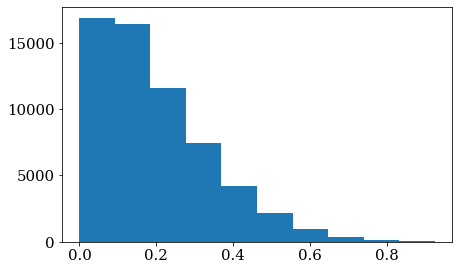

In [188]:
plt.hist(df_all.Xb)

(array([135., 366., 524., 514., 538., 609., 649., 661., 597., 669., 653.,
        671., 701., 674., 675., 697., 690., 636., 693., 665., 704., 641.,
        648., 643., 615., 640., 657., 668., 636., 679., 712., 694., 629.,
        674., 672., 633., 617., 604., 646., 689., 629., 607., 649., 694.,
        590., 645., 611., 569., 644., 611., 626., 618., 601., 606., 608.,
        566., 592., 607., 598., 566., 537., 589., 563., 617., 602., 606.,
        553., 649., 562., 602., 588., 559., 570., 555., 550., 505., 599.,
        597., 565., 578., 523., 576., 514., 572., 592., 497., 595., 585.,
        543., 491., 624., 551., 529., 601., 569., 583., 537., 551., 576.,
        614.]),
 array([0.00626349, 0.01619963, 0.02613578, 0.03607192, 0.04600806,
        0.05594421, 0.06588035, 0.07581649, 0.08575264, 0.09568878,
        0.10562493, 0.11556107, 0.12549721, 0.13543336, 0.1453695 ,
        0.15530564, 0.16524179, 0.17517793, 0.18511408, 0.19505022,
        0.20498636, 0.21492251, 0.22485865, 0.

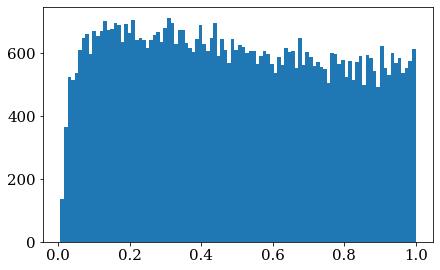

In [191]:
plt.hist(df_all.ye,bins=100)

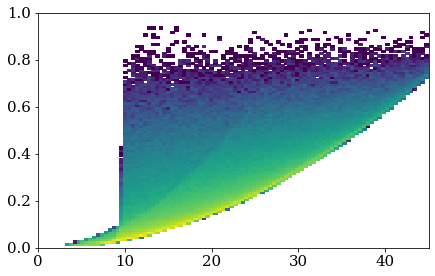

In [560]:
q = "Q2 >100 and ye < 0.9 and ye > 0.01"
df = df_nu.query(q)

plt.hist2d(df.Neutrino_PT,df.Xb,bins=100,norm=mpl.colors.LogNorm(),range=((0,45),(0,1)))
plt.show()

(array([ 2481.,  7039.,  9269., 10852., 11255., 11719., 11995., 12255.,
        12159., 12360., 12511., 12545., 12445., 12554., 12428., 12342.,
        12184., 12260., 12255., 12185., 12000., 12217., 11905., 11730.,
        11989., 11805., 11718., 11775., 11753., 11560., 11428., 11134.,
        11360., 11255., 11205., 10963., 11001., 10925., 10913., 10748.,
        10694., 10657., 10445., 10705., 10529., 10360., 10278., 10250.,
        10276., 10196., 10000., 10081.,  9869., 10165.,  9833.,  9828.,
         9612.,  9503.,  9442.,  9470.,  9304.,  9420.,  9401.,  9335.,
         9246.,  9208.,  9173.,  8964.,  9067.,  8960.,  8969.,  8853.,
         8837.,  8796.,  8746.,  8673.,  8787.,  8736.,  8653.,  8546.,
         8444.,  8579.,  8454.,  8532.,  8275.,  8254.,  8213.,  8294.,
         8205.,  8105.,  8111.,  8151.,  8163.,  8067.,  7930.,  7978.,
         7859.,  7996.,  8008.,  8038.]),
 array([0.00593436, 0.01587498, 0.0258156 , 0.03575622, 0.04569684,
        0.05563746, 0.0655

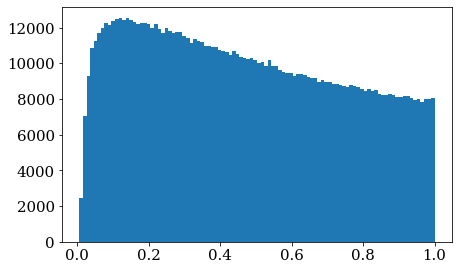

(array([11788., 32642., 48347., 57012., 60103., 59439., 55282., 50072.,
        45054., 39552., 35321., 31094., 27412., 24392., 21803., 19180.,
        17384., 15716., 13966., 12696., 11652., 10579.,  9705.,  8609.,
         8147.,  7510.,  6984.,  6482.,  6030.,  5614.,  5285.,  4969.,
         4672.,  4409.,  4080.,  3956.,  3647.,  3453.,  3428.,  3202.,
         3144.,  2959.,  2789.,  2708.,  2586.,  2563.,  2558.,  2427.,
         2386.,  2292.,  2165.,  2261.,  2151.,  2151.,  2005.,  2084.,
         1955.,  1990.,  2004.,  1856.,  1967.,  1932.,  1918.,  1963.,
         1897.,  1855.,  1917.,  1897.,  1942.,  1900.,  1947.,  1920.,
         2065.,  2112.,  2094.,  2141.,  2128.,  2138.,  2170.,  2235.,
         2289.,  2286.,  2261.,  2430.,  2422.,  2360.,  2407.,  2403.,
         2312.,  2229.,  2165.,  2178.,  2030.,  1847.,  1656.,  1578.,
         1450.,  1344.,  1203.,  1148.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 

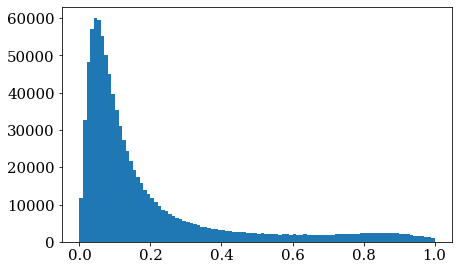

In [23]:
plt.hist(df_rg.eval("Gen_qT/Neutrino_PT"),bins=100,range=(0,1))

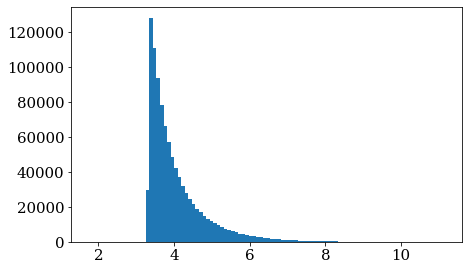

In [34]:
plt.hist(df_rg.eval("Neutrino_Eta-GenMissingET_Eta"),bins=100)
plt.show()

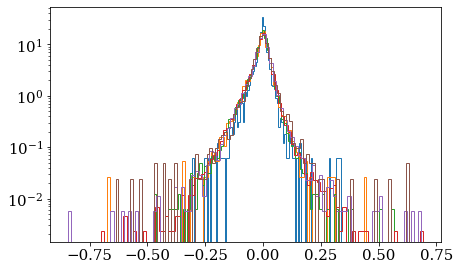

In [108]:
partitions = [0,1,2,4,8,12,20]
for i in range(len(partitions)-1):
    df = df_jets.query(f'GenJet_PT>10 and Jet_PT>10 and GenJet_NNeutrals >= {partitions[i]} and GenJet_NNeutrals < {partitions[i+1]}')
    plt.hist(df.Jet_Eta-df.GenJet_Eta,histtype='step', bins=100,density=True)
plt.gca().set_yscale('log')
plt.show()

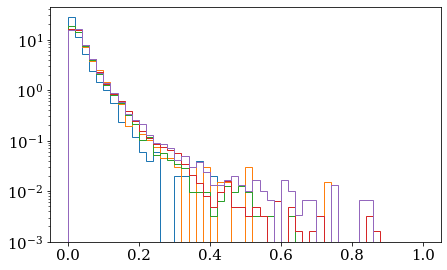

In [114]:
partitions = [0,1,2,4,8,20]
for i in range(len(partitions)-1):
    df = df_jets.query(f'GenJet_PT>10 and Jet_PT>10 and GenJet_NNeutrals >= {partitions[i]} and GenJet_NNeutrals < {partitions[i+1]}')
    plt.hist(np.hypot(df.Jet_Phi-df.GenJet_Phi,df.Jet_Eta-df.GenJet_Eta),histtype='step', bins=50,density=True,range=(0,1))
plt.gca().set_yscale('log')
plt.show()

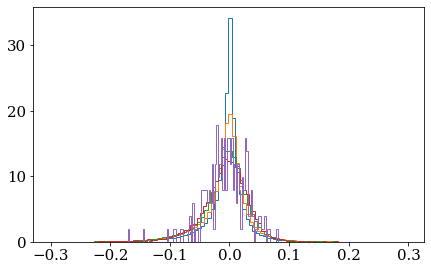

In [128]:
partitions = [0,0.01,0.5,0.9,.990,1]
for i in range(len(partitions)-1):
    df = df_jets.query(f'GenJet_PT>10 and Jet_PT>10 and GenJet_NeutralEnergyFraction >= {partitions[i]} and GenJet_NeutralEnergyFraction < {partitions[i+1]}')
    plt.hist(df.Jet_Eta-df.GenJet_Eta,histtype='step', bins=100,density=True)
#plt.gca().set_yscale('log')
plt.show()

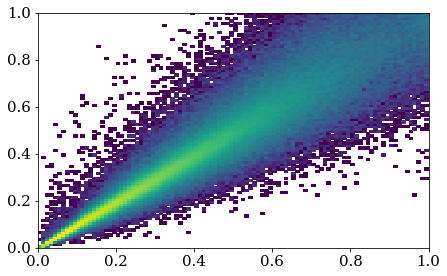

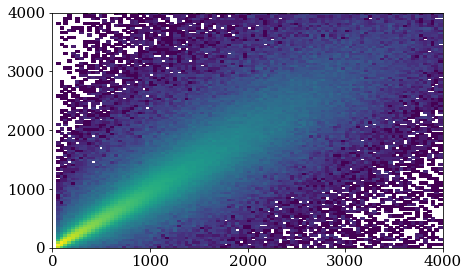

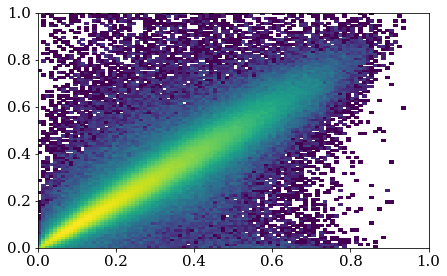

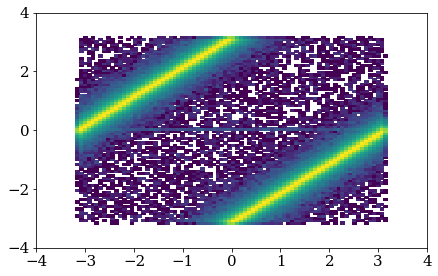

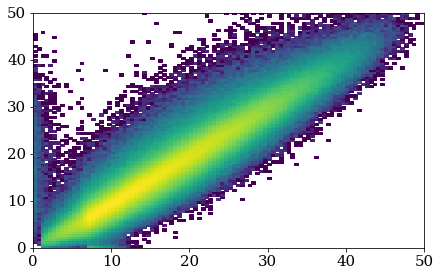

In [24]:
plt.hist2d(df_nu.Gen_y,df_nu.JB_y,norm=mpl.colors.LogNorm(),bins=100, range=((0,1),(0,1)))
plt.show()
plt.hist2d(df_nu.Gen_Q2,df_nu.JB_Q2,norm=mpl.colors.LogNorm(),bins=100, range=((-1,4000),(-1,4000)))
plt.show()
plt.hist2d(df_nu.Gen_x,df_nu.JB_x,norm=mpl.colors.LogNorm(),bins=100, range=((0,1),(0,1)))
plt.show()
plt.hist2d(df_nu.Neutrino_Phi,df_nu.JB_Phi,norm=mpl.colors.LogNorm(),bins=100, range=((-4,4),(-4,4)))
plt.show()
plt.hist2d(df_nu.Neutrino_PT,df_nu.JB_MET,norm=mpl.colors.LogNorm(),bins=100, range=((0,50),(0,50)))
plt.show()

In [18]:
print([x for x in df_nu.columns if 'JB' in x])

['JB_MET', 'JB_Eta', 'JB_Phi', 'JB_Q2', 'JB_x', 'JB_y']


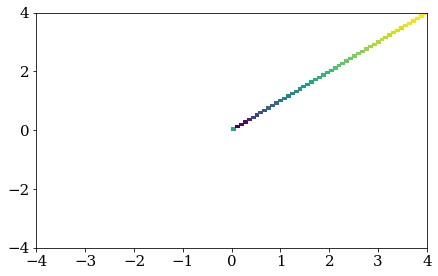

In [27]:
plt.hist2d(df_nu.MissingET_MET,df_nu.JB_MET,norm=mpl.colors.LogNorm(),bins=100, range=((-4,4),(-4,4)))
plt.show()

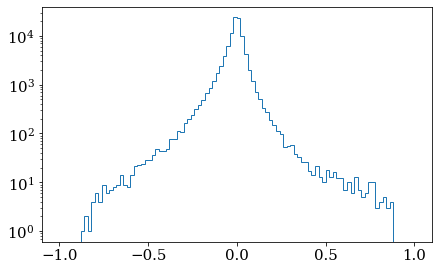

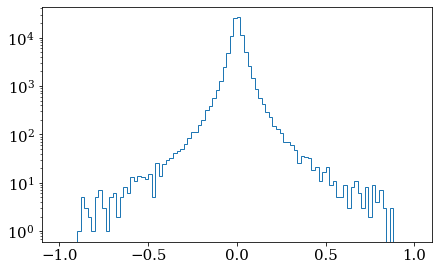

In [110]:
plt.hist(df_jets.query('GenJet_PT>0 and Jet_PT>0').eval("Jet_Eta-GenJet_Eta"),bins=100, range=(-1,1),histtype='step')
plt.gca().set_yscale('log')
plt.show()
plt.hist(df_jets.query('GenJet_PT>0 and Jet_PT>0').eval("Jet_Phi-GenJet_Phi"),bins=100, range=(-1,1),histtype='step')
plt.gca().set_yscale('log')

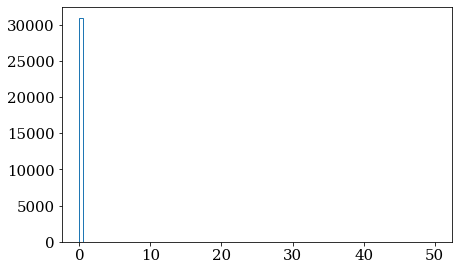

In [188]:
plt.hist(df_hadrons.query('Hadron_Charge == 0').eval('Hadron_P'),bins=100,histtype='step', range=(0,50))
#plt.hist(df_hadrons.query('GenHadron_P>0 and GenHadron_Charge == 0').eval('GenHadron_P'),bins=100,histtype='step', range=(0,50))
plt.show()

In [189]:
for col in df_hadrons.columns:
    if 'Hadron' in col:
        print(col)

Hadron_PID
Hadron_Charge
Hadron_P
Hadron_PT
Hadron_Eta
Hadron_Phi
Hadron_E
Hadron_ET
Hadron_Eem
Hadron_Ehad
GenHadron_PID
GenHadron_Charge
GenHadron_P
GenHadron_PT
GenHadron_Eta
GenHadron_Phi
GenHadron_E
Hadron_i
Hadron_Px
Hadron_Py
Hadron_Pz
GenHadron_Px
GenHadron_Py
GenHadron_Pz
Hadron_Jt
Hadron_Zh
GenHadron_Jt
GenHadron_Zh


(array([  27.,   27.,   34.,   20.,   32.,   25.,   37.,   33.,   20.,
          31.,   29.,   29.,   34.,   47.,   25.,   33.,   40.,   41.,
          40.,   38.,   51.,   42.,   46.,   45.,   62.,   67.,   66.,
          78.,   75.,   84.,   64.,   96.,  101.,  104.,  105.,  109.,
         111.,  128.,  155.,  152.,  155.,  175.,  202.,  225.,  295.,
         415.,  674., 1310., 2774., 6423., 5508., 2629., 1315.,  693.,
         425.,  324.,  271.,  236.,  176.,  162.,  120.,  150.,  131.,
         104.,  112.,  100.,  100.,   85.,   77.,   84.,   88.,   78.,
          69.,   54.,   62.,   50.,   43.,   62.,   38.,   62.,   50.,
          43.,   47.,   38.,   28.,   27.,   29.,   30.,   23.,   25.,
          25.,   26.,   24.,   29.,   24.,   24.,   20.,   22.,   20.,
          18.]),
 array([-5. , -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4. ,
        -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3. , -2.9,
        -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1

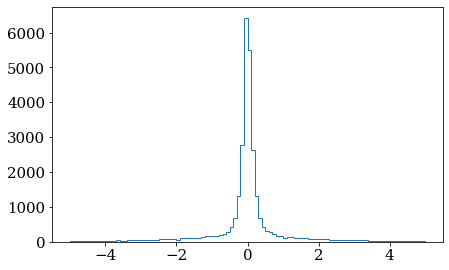

In [209]:
plt.hist(df_hadrons.query('Hadron_E>0 and GenHadron_E>0').eval('Hadron_E-GenHadron_E'),histtype='step',bins=100, range=(-5,5))
#plt.gca().set_yscale('log')

(array([372.,  89., 132., 120., 178., 173., 190., 151., 182., 190., 172.,
        180., 183., 166., 153., 142., 136., 122., 115., 123., 114., 121.,
        105., 110.,  93.,  99.,  91., 111.,  86.,  77.,  74.,  64.,  92.,
         75.,  70.,  60.,  66.,  76.,  66.,  50.,  56.,  43.,  50.,  50.,
         54.,  45.,  29.,  41.,  39.,  43.,  29.,  44.,  37.,  33.,  27.,
         32.,  38.,  26.,  30.,  24.,  30.,  32.,  25.,  22.,  29.,  26.,
         11.,  20.,  27.,  24.,  24.,  18.,  25.,  26.,  18.,  21.,  23.,
         18.,  11.,  15.,  18.,  27.,  14.,  17.,  12.,  10.,  22.,  14.,
          8.,  14.,   7.,  11.,  14.,  12.,   8.,   7.,  11.,   5.,   8.,
         10.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
        16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
        22. , 22.5, 23

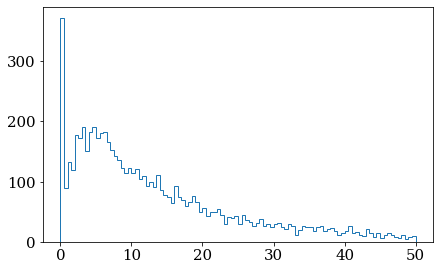

In [211]:
plt.hist(df_jets.query('Jet_E>0').eval('Jet_E*Jet_NeutralEnergyFraction'),histtype='step',bins=100, range=(0,50))
#plt.gca().set_yscale('log')

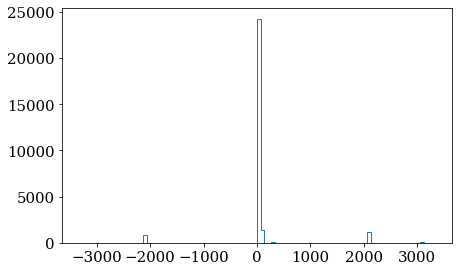

In [23]:
plt.hist(df_hadrons.query('GenHadron_Charge==0').eval('GenHadron_PID'),histtype='step',bins=100)
#plt.gca().set_yscale('log')
plt.show()


In [15]:
import ROOT
import collections
pdg = ROOT.TDatabasePDG()
l = list(set(df_hadrons.eval('GenHadron_PID')))
l.sort()
tot = len(df_hadrons)
for x in l:
    print(x,pdg.GetParticle(x).GetName(), 
          len(df_hadrons.query(f'GenHadron_PID=={x}'))/tot,sep='\t')

-3334	Omega+	1.179547542076525e-07
-3322	Xi0_bar	4.588439938677682e-05
-3312	Xi-_bar	2.5242317400437635e-05
-3222	Sigma+_bar	2.5124362646229983e-05
-3122	Lambda0_bar	0.0005586337159274422
-3112	Sigma-_bar	8.26862826995644e-05
-2212	antiproton	0.015986879656779973
-2112	antineutron	0.013060658114396531
-321	K-	0.02876586181812863
-211	pi-	0.22861848914822158
-13	mu+	6.180829120480991e-05
-11	e+	0.0017414839911217815
11	e-	0.0018832656056793798
13	mu-	0.00027801935566743697
22	gamma	0.42721454448174045
130	K_L0	0.02488680177125577
211	pi+	0.18601889375661948
310	K_S0	0.0020171442517050654
321	K+	0.028971221045204155
2112	neutron	0.01957164259190474
2212	proton	0.018878186591917954
3112	Sigma-	0.00023991997005836518
3122	Lambda0	0.0009237036802001268
3222	Sigma+	3.5150516753880443e-05
3312	Xi-	3.77455213464488e-05
3322	Xi0	7.089080727879915e-05


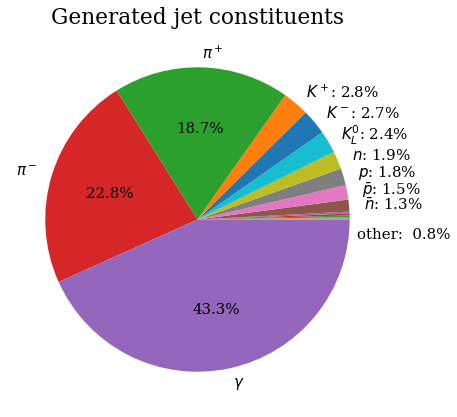

In [163]:

df = df_hadrons.query('GenJet_PT>10 and Gen_Q2>100')
l = list(set(df_hadrons.eval('GenHadron_PID')))
tot = len(df)
results = []
for x in l:
    results.append({'pid':x,'name':pdg.GetParticle(x).GetName(), 'frac':
          len(df.query(f'GenHadron_PID=={x}'))/tot})
#print(results)    
results.sort(key=lambda a: a['frac'])

fig,axs = plt.subplots(1,1,figsize=(7,7))

fracs = [r['frac'] for r in results]

latex_names = {211:'$\\pi^+$',-211:'$\\pi^-$',-2112:'$\\bar n$',2112:'$n$',
              321:'$K^+$',-321:'$K^-$',-2212:'$\\bar p$',2212:'$p$',
              22:'$\\gamma$',130:'$K^0_L$'}
labels = []

tot_others = 0

for r in results:
    if r['pid'] not in latex_names.keys():
        labels.append('')
        tot_others+= r['frac']
    elif r['frac']>.05:
        labels.append(latex_names[r['pid']])
    else :
        labels.append(f"{latex_names[r['pid']]}: {r['frac']*100:.1f}%")
#names = [r['name'] for r in results]
autopct = lambda x: ('%.1f%%'%x if x>5 else '')
plt.pie(fracs, labels=labels,autopct=autopct)

txt = f'other:  {tot_others*100:.1f}%'
plt.text(0.92,0.45, txt, transform=axs.transAxes)

#txt = ''
#for r in results:
#    if r['pid'] not in latex_names.keys():
#        txt+=f"{r['name']} {r['frac']*100:.2f}%\n"
#plt.text(0.8,0.2, txt, transform=axs.transAxes)
axs.set_title("Generated jet constituents")
plt.savefig("images/constituents.png")
plt.show()

Help on TParticlePDG in module __main__ object:

class TParticlePDG(TNamed)
 |  cppyy object proxy (internal)
 |  
 |  Method resolution order:
 |      TParticlePDG
 |      TNamed
 |      TObject
 |      CPPInstance
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  AddDecayChannel(...)
 |      int TParticlePDG::AddDecayChannel(int Type, double BranchingRatio, int NDaughters, int* DaughterPdgCode)
 |  
 |  AntiParticle(...)
 |      TParticlePDG* TParticlePDG::AntiParticle()
 |      const TParticlePDG* TParticlePDG::AntiParticle()
 |  
 |  Beauty(...)
 |      int TParticlePDG::Beauty()
 |  
 |  Charge(...)
 |      double TParticlePDG::Charge()
 |  
 |  Charm(...)
 |      int TParticlePDG::Charm()
 |  
 |  Class(...)
 |      static TClass* TParticlePDG::Class()
 |  
 |  Class_Name(...)
 |      static const char* TParticlePDG::Class_Name()
 |  
 |  Class_Version(...)
 |      static short TParticlePDG::Class_Version()
 |  
 |  DecayChannel(...)
 |      TDecayChannel* TParticle